# Nanodegree Engenheiro de Machine Learning

## Proposta de projeto final: Ranking de segmento de empresas de saneamento basico

## Começando

Neste projeto iremos analisar as empresas de saneamento quanto ao relacionamento entre a estrutura de propriedade e a eficiência operacional obtida por diversos atributos. Para compor o ranking de empresas, consideramos os conjunto de dados fornecidos pelo Sistema Nacional de Informações sobre Saneamento (SNIS) e pelo Instituto Trata Brasil. Por fim, vamos comparar os segmentos encontrados com uma marcação adicional e considerar a maneira como essa informação poderia auxiliar os prefeitos dos municípios com futuras tomadas de decisões sobre o serviço de saneamento básico de suas cidades.

O conjunto de dados de entrada considerado para o projeto foi obtido do site do [Sistema Nacional de Informações sobre Saneamento - SNIS](http://app3.cidades.gov.br), em Água e Esgoto no item 'Agrupamento dinâmico de indicadores e informações desagregadas por ano de referência' e concatenado com os dados do [Instituto Trata Brasil](http://www.tratabrasil.org.br/datafiles/estudos/ranking/2016/tabela-das-100-cidades.pdf).

Para compor o Ranking, o Instituto Trata Brasil considera várias informações fornecidas pelas operadoras de saneamento presentes em cada um dos municípios brasileiros. Os dados são retirados do Sistema Nacional de Informações sobre Saneamento (SNIS),

Para fiz estatisticos vamos considerar dois tipos de empresas. As empresas de natureza jurídica 'Privada' são empresas privadas e a empresas de natureza jurídica diferente de 'Privada' serão consideradas como 'Públicas', até mesmo as empresas de economia mista.

### Bibliotecas necessárias para o projeto

- Python: 3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
- [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
- numpy: 1.14.2
- pandas: 0.23.0
- seaborn: 0.8.1
- matplotlib: 2.2.2
- sklearn: 0.19.1
- IPython: 6.4.0

## Começando

Descrição dos atributos do Dataset:

- **Cód Município:** Código do Município;
- **Tp Empresa:** Tipo Empresa;
- **Nat Juridica:** Natureza Jurídica;
- **Pop Total:** População total do município do ano de referência(Habitantes);
- **Perdas Fat:** Índice de perdas faturamento(%)';
- **Perdas Dist:** Índice de perdas na distribuição (%);
- **Tarifa méd:** Tarifa média praticada (Reais/m³);
- **Ext rede água:** Extensão da rede de água (km);
- **Ext rede esgotos:** Extensão da rede de esgotos (km);
- **Empregados:** Quantidade total de empregados próprios
- **Município:** Cidade;
- **UF:** Estado;
- **Empresa:** Operador;
- **At Água:** Indicador de atendimento urbano de água(%)
- **At Esgoto:** Indicador de atendimento urbano de esgoto(%)
- **Novas Lig Água:** Indicador novas ligações de água/ligações faltantes (%);
- **Novas Lig Esgoto:** Indicador novas ligações de esgoto/ligações faltantes (%);
- **Ev Perdas Fat:** Indicador evolução nas perdas de faturamento (%)';
- **Ev Perdas Dist:** Indicador evolução nas perdas de distribuição (%);
- **Esg Tratado:** Indicador de esgoto tratado por água consumida (%);
- **Investimento:** Investimento 5 anos (Milhões de Reais)

In [1]:
# Importe das bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

import sys

%matplotlib inline

# Importa o código sumplementar para visualização de visuals.py e envelopement.py
import visuals as vs
import envelopment as env

In [2]:
# Carrega o conjunto de dados dos clientes da distribuidora de atacado
try:
    df_san = pd.read_csv("dados_limpos_saneamentoDEA.csv")
    print(df_san.head())
    print("O Conjunto de dados de saneamento possui {} amostras com {} atributos cada.".format(*df_san.shape))
except:
    print("O conjunto de dados não pôde ser carregado. O conjunto de dados está faltando?")

   Cód Município Tp Empresa Nat Jurídica  Pop Total  Perdas Fat  Perdas Dist  \
0         355030    Pública     SEMAPubl   12038175       24.69        36.69   
1         330455    Pública     SEMAPubl    6498837       52.41        25.36   
2         530010    Pública     SEMAPubl    2977216       24.71        35.21   
3         292740    Pública     SEMAPubl    2938092       44.19        53.07   
4         230440    Pública     SEMAPubl    2609716       26.66        42.64   

   Tarifa méd  Ext rede água  Ext rede esgotos  Empregados       ...        \
0        3.66       21262.00          17101.64        4897       ...         
1        4.16       10891.20           4864.51        3105       ...         
2        4.74        8534.49           6377.11        2517       ...         
3        3.66        5358.67           3506.06        1447       ...         
4        2.99        4112.66           2442.27        5910       ...         

         Empresa At Água At Esgoto Novas Lig Água 

## Explorando os Dados
Nesta seção, exploramos os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Observamos as descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados.

In [3]:
df_san.describe()

Cód Município     Pop Total  Perdas Fat  Perdas Dist  Tarifa méd  \
count      95.000000  9.500000e+01   95.000000    95.000000   95.000000   
mean   326837.052632  8.449723e+05   35.674632    41.844737    3.571053   
std     90759.098356  1.423472e+06   18.386247    12.844149    0.974473   
min    110020.000000  2.713390e+05  -13.140000    13.050000    1.690000   
25%    275230.000000  3.431425e+05   23.850000    33.490000    2.950000   
50%    330455.000000  4.654950e+05   35.610000    40.290000    3.540000   
75%    355160.000000  7.045655e+05   49.055000    49.025000    4.015000   
max    530010.000000  1.203818e+07   69.770000    70.880000    6.690000   

       Ext rede água  Ext rede esgotos   Empregados  Código do município  \
count      95.000000         95.000000    95.000000            95.000000   
mean     2047.800211       1245.594947  3325.210526        326837.052632   
std      2614.552249       2019.924951  2311.073127         90759.098356   
min       361.000000         12.220000   136.000000        110020.000000   
25%       915.400000        420.990000  1370.000000        275230.000000   
50%      1378.610000        687.700000  2820.000000        330455.000000   
75%      1957.110000       1344.275000  4395.000000        355160.000000   
max     21262.000000      17101.640000  8980.000000        530010.000000   

          At Água   At Esgoto  Novas Lig Água  Novas Lig Esgoto  \
count   95.000000   95.000000       95.000000         95.000000   
mean    93.290526   68.203895       53.697579         26.856105   
std     13.306086   29.356315       39.390130         32.703896   
min     30.100000    0.750000        0.000000          0.000000   
25%     91.350000   45.435000       12.930000          3.505000   
50%     99.700000   75.290000       54.930000         12.920000   
75%    100.000000   94.895000       99.375000         35.030000   
max    100.000000  100.000000      100.000000        100.000000   

       Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  Investimento  \
count      95.000000       95.000000    95.000000     95.000000   
mean       14.156842        4.068000    51.099053    338.039895   
std        54.275382        9.347174    31.673615    954.983987   
min         0.000000        0.000000     0.000000      0.000000   
25%         0.000000        0.000000    24.395000     78.720000   
50%         0.000000        0.000000    51.550000    159.930000   
75%         5.575000        4.515000    77.335000    290.485000   
max       430.860000       69.350000   100.000000   9113.980000   

       Eficiencia_DEA  
count       95.000000  
mean        38.606737  
std        576.395807  
min      -5425.940000  
25%         70.810000  
50%         90.680000  
75%        100.000000  
max       1105.490000

In [4]:
df_san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 23 columns):
Cód Município          95 non-null int64
Tp Empresa             95 non-null object
Nat Jurídica           95 non-null object
Pop Total              95 non-null int64
Perdas Fat             95 non-null float64
Perdas Dist            95 non-null float64
Tarifa méd             95 non-null float64
Ext rede água          95 non-null float64
Ext rede esgotos       95 non-null float64
Empregados             95 non-null int64
Código do município    95 non-null int64
Município              95 non-null object
UF                     95 non-null object
Empresa                95 non-null object
At Água                95 non-null float64
At Esgoto              95 non-null float64
Novas Lig Água         95 non-null float64
Novas Lig Esgoto       95 non-null float64
Ev Perdas Fat          95 non-null float64
Ev Perdas Dist         95 non-null float64
Esg Tratado            95 non-null float64
Investi

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157773c8>,
      dtype=object)

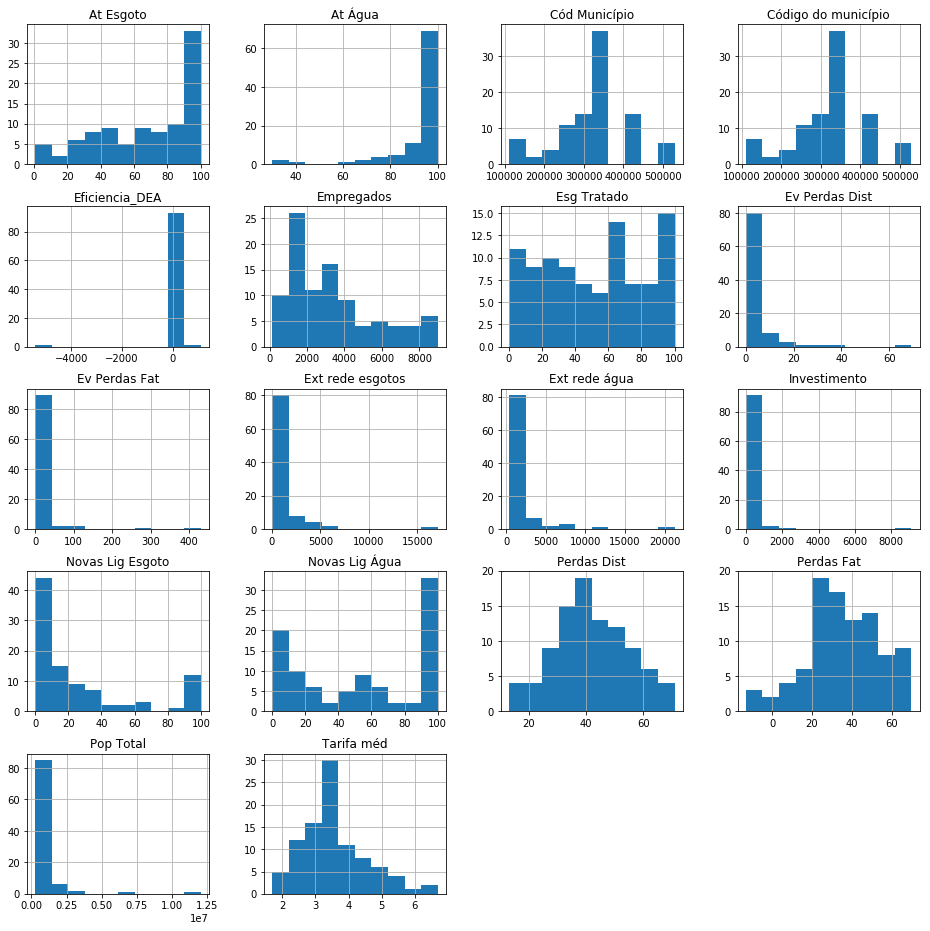

In [5]:
df_san.hist(figsize=(16,16))

In [6]:
# Algumas informações do Dataset
print('Existem {:d} pontos no conjunto de dados de 2016'.format(df_san.shape[0]))

# Verificando os quartis de Frozen, por exemplo
print('A média das eficiências das empresas foi de {:.2f}%.'.format(df_san['Eficiencia_DEA'].mean()))

qtiles = df_san['Eficiencia_DEA'].quantile([.25, .5, .75]).values
print('A mediana das eficiências das empresas foi de {:.2f}%.'.format(qtiles[1]))
print('25% das empresas foram abaixo de {:.2f}% de eficiência.'.format(qtiles[0]))
print('25% das empresas atingiram {:.2f}% de eficiência.'.format(qtiles[2]))

Existem 95 pontos no conjunto de dados de 2016
A média das eficiências das empresas foi de 38.61%.
A mediana das eficiências das empresas foi de 90.68%.
25% das empresas foram abaixo de 70.81% de eficiência.
25% das empresas atingiram 100.00% de eficiência.


In [7]:
# df com os nomes dos municipios
df_municipios = df_san['Município']

In [8]:
# df somente com os atributos previsores
df_previsores = df_san.drop(columns=['Cód Município', 
                                     'Código do município',
                                     'Tp Empresa',
                                     'Nat Jurídica',
                                     'Código do município',
                                     'UF',
                                     'Empresa',
                                     'Município',
                                     'Pop Total'
                                    ])

In [9]:
# df com os atributos que vão ser aplicado o logaritmo natural nas ultimas colunas
# atributos a serem aplicadas: 'Investimento', 'Ext rede água', 'Ext rede esgotos', 'Empregados'
df_previsores = df_previsores[['Perdas Fat', 
                              'Perdas Dist', 
                              'Tarifa méd',
                              'At Água', 
                              'At Esgoto',
                              'Novas Lig Água', 
                              'Novas Lig Esgoto', 
                              'Ev Perdas Fat', 
                              'Ev Perdas Dist',
                              'Esg Tratado',  
                              'Eficiencia_DEA',
                              'Investimento',
                              'Ext rede água',
                              'Ext rede esgotos',
                              'Empregados'
                             ]]

In [10]:
df_previsores.head()

Perdas Fat  Perdas Dist  Tarifa méd  At Água  At Esgoto  Novas Lig Água  \
0       24.69        36.69        3.66    100.0      97.00           77.37   
1       52.41        25.36        4.16     99.0      85.16           58.78   
2       24.71        35.21        4.74     99.1      85.23           68.48   
3       44.19        53.07        3.66     90.6      78.77           18.01   
4       26.66        42.64        2.99     83.3      49.68            5.61   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0             57.45           0.00            0.00        61.96   
1             17.29           0.84            3.90        44.51   
2             12.41           0.88            0.00        84.42   
3             14.92          25.82            0.00       100.00   
4              7.77          14.36            6.78        53.19   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0           65.39       9113.98       21262.00          17101.64        4897  
1           66.43       1922.68       10891.20           4864.51        3105  
2           58.17        878.80        8534.49           6377.11        2517  
3           97.30        544.32        5358.67           3506.06        1447  
4           56.74        806.14        4112.66           2442.27        5910

In [11]:
df_previsores.shape

(95, 15)

In [12]:
df_san_quartil = pd.DataFrame(df_municipios).join(df_previsores)

In [13]:
df_san_quartil = df_san_quartil.pivot_table(index='Município').sort_values(['Eficiencia_DEA'])

In [14]:

df_san_quartil.describe().round(2)

At Esgoto  At Água  Eficiencia_DEA  Empregados  Esg Tratado  \
count      95.00    95.00           95.00       95.00        95.00   
mean       68.20    93.29           38.61     3325.21        51.10   
std        29.36    13.31          576.40     2311.07        31.67   
min         0.75    30.10        -5425.94      136.00         0.00   
25%        45.44    91.35           70.81     1370.00        24.40   
50%        75.29    99.70           90.68     2820.00        51.55   
75%        94.90   100.00          100.00     4395.00        77.34   
max       100.00   100.00         1105.49     8980.00       100.00   

       Ev Perdas Dist  Ev Perdas Fat  Ext rede esgotos  Ext rede água  \
count           95.00          95.00             95.00          95.00   
mean             4.07          14.16           1245.59        2047.80   
std              9.35          54.28           2019.92        2614.55   
min              0.00           0.00             12.22         361.00   
25%              0.00           0.00            420.99         915.40   
50%              0.00           0.00            687.70        1378.61   
75%              4.52           5.57           1344.28        1957.11   
max             69.35         430.86          17101.64       21262.00   

       Investimento  Novas Lig Esgoto  Novas Lig Água  Perdas Dist  \
count         95.00             95.00           95.00        95.00   
mean         338.04             26.86           53.70        41.84   
std          954.98             32.70           39.39        12.84   
min            0.00              0.00            0.00        13.05   
25%           78.72              3.50           12.93        33.49   
50%          159.93             12.92           54.93        40.29   
75%          290.48             35.03           99.38        49.02   
max         9113.98            100.00          100.00        70.88   

       Perdas Fat  Tarifa méd  
count       95.00       95.00  
mean        35.67        3.57  
std         18.39        0.97  
min        -13.14        1.69  
25%         23.85        2.95  
50%         35.61        3.54  
75%         49.06        4.02  
max         69.77        6.69

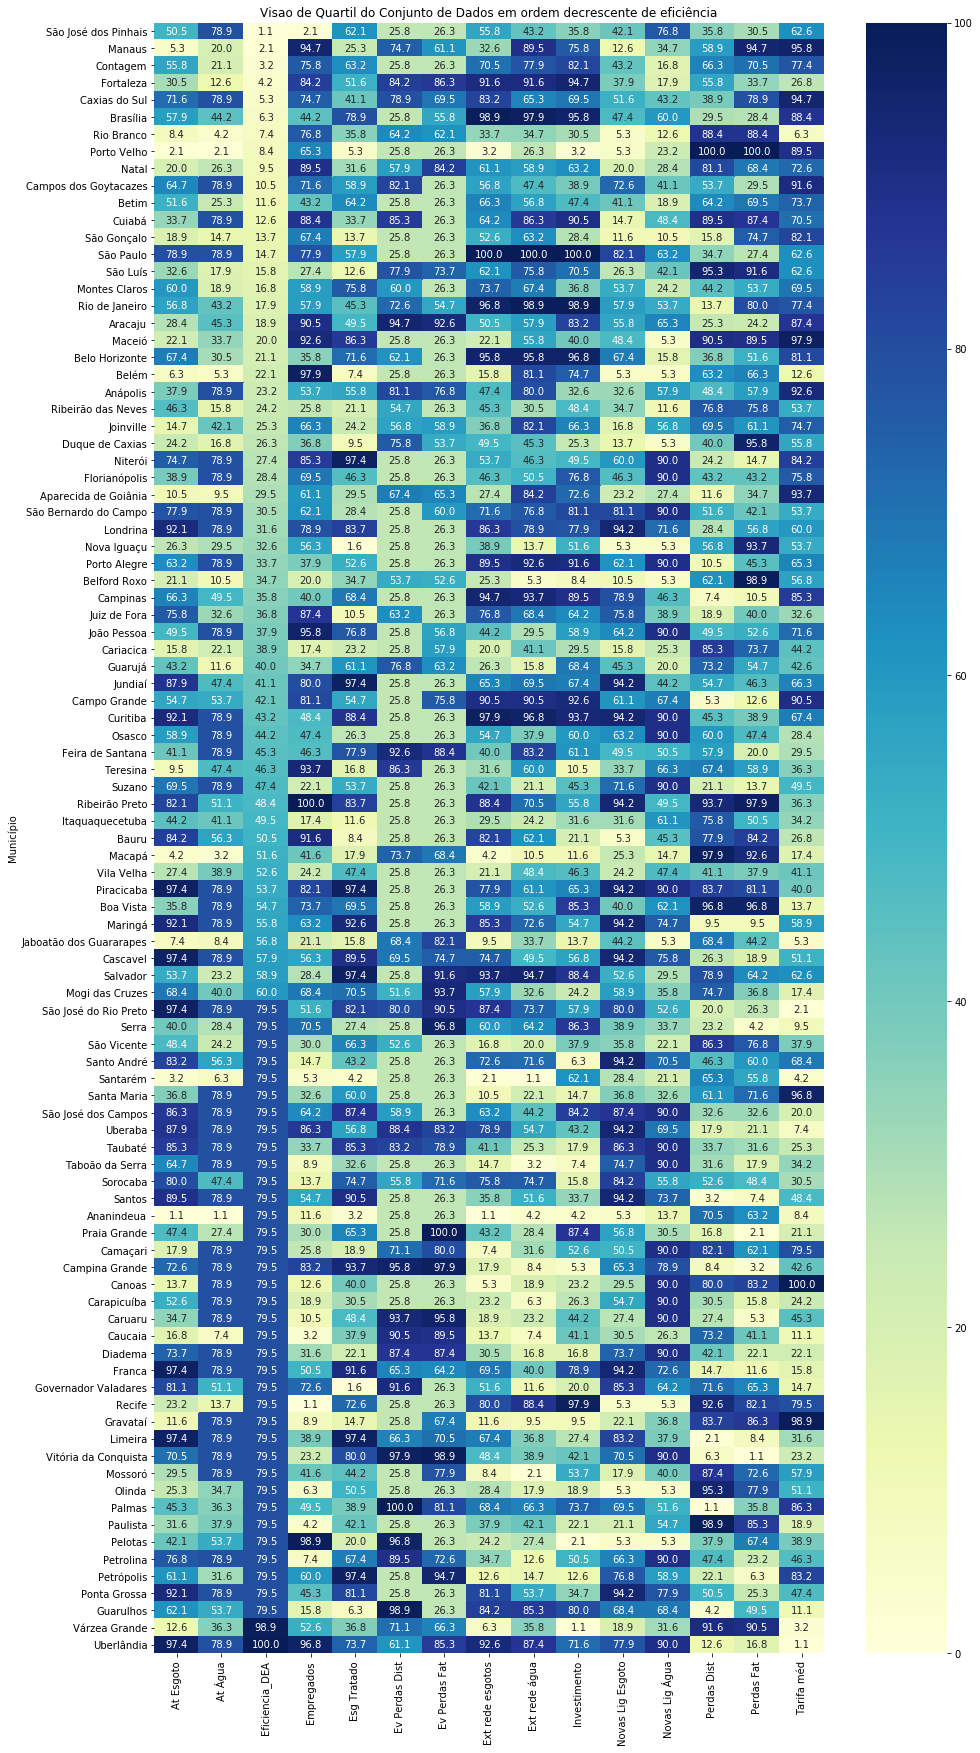

In [15]:
plt.figure(figsize=(15, 30))
plt.title('Visao de Quartil do Conjunto de Dados em ordem decrescente de eficiência')
quartil_conjunto = 100 * df_san_quartil.rank(axis = 0, pct = True)
sns.heatmap(quartil_conjunto, 
            annot = True, 
            cmap = 'YlGnBu', 
            fmt = '.1f', 
            robust = bool, 
            vmin=0, 
            vmax=100)

<Figure size 720x720 with 0 Axes>

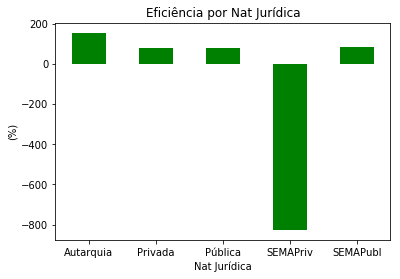

In [16]:
#Criando um gráfico de barra mostrando a eficiencia por natureza
plt.figure(figsize=(10,10))
df_san.groupby('Nat Jurídica', as_index=False)['Eficiencia_DEA'].mean().plot(kind='bar',
                                                                             rot=0, 
                                                                             color='green', 
                                                                             x='Nat Jurídica',
                                                                             legend=False,
                                                                             title='Eficiência por Nat Jurídica'
                                                                            ).set_ylabel('(%)')
plt.show()

In [17]:
# separando um df somente com os atributos para analise
valores_df = pd.DataFrame(df_san.groupby('Nat Jurídica')['Eficiencia_DEA', 
                                                         'At Água', 
                                                         'At Esgoto', 
                                                         'Esg Tratado', 
                                                         'Novas Lig Água', 
                                                         'Novas Lig Esgoto', 
                                                         'Perdas Fat', 
                                                         'Perdas Dist', 
                                                         'Ev Perdas Fat', 
                                                         'Ev Perdas Dist'].mean())
valores_df.head()

Eficiencia_DEA     At Água  At Esgoto  Esg Tratado  \
Nat Jurídica                                                       
Autarquia         155.569375   97.050000  85.766875    49.350625   
Privada            80.003750   97.575000  72.628750    63.870000   
Pública            78.660000   96.100000  95.010000     6.880000   
SEMAPriv         -828.775000  100.000000  95.875000    87.746667   
SEMAPubl           84.882656   91.142187  60.247031    47.195000   

              Novas Lig Água  Novas Lig Esgoto  Perdas Fat  Perdas Dist  \
Nat Jurídica                                                              
Autarquia          61.198125         42.623750   41.961875    42.008750   
Privada            57.391250         23.845000   28.376250    32.250000   
Pública            31.420000         35.440000   29.640000    31.520000   
SEMAPriv           99.405000         84.825000   24.695000    35.030000   
SEMAPubl           47.423750         17.721875   36.138750    43.803281   

              Ev Perdas Fat  Ev Perdas Dist  
Nat Jurídica                                 
Autarquia          5.860000        6.262500  
Privada            8.938750       11.208750  
Pública            0.000000        1.800000  
SEMAPriv           0.891667        0.508333  
SEMAPubl          18.348125        2.995938

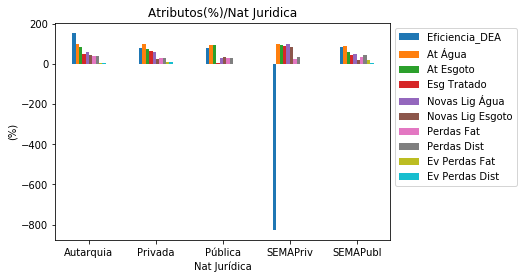

In [18]:
#Criando um gráfico de barras das naturezas e os atributos percetuais
valores_df.plot(kind='bar', rot=0).get_legend().set_bbox_to_anchor((1, 1))
plt.title('Atributos(%)/Nat Juridica')
plt.ylabel('(%)')
plt.show()

### Observação
Nesse gráfico identificamos uma eficiência acima de 100%, pode ser um dado discrepante.

In [19]:
df_san[['Município','Investimento']].head()

Município  Investimento
0       São Paulo       9113.98
1  Rio de Janeiro       1922.68
2        Brasília        878.80
3        Salvador        544.32
4       Fortaleza        806.14

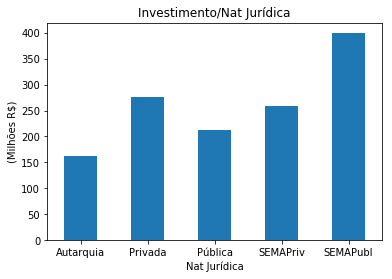

In [20]:
# média de investimento por natureza
pd.DataFrame(df_san.groupby('Nat Jurídica')['Investimento'].mean()).plot(kind='bar', 
                                                                         rot=0, 
                                                                         legend=False,
                                                                         title='Investimento/Nat Jurídica'
                                                                        ).set_ylabel('(Milhões R$)')

plt.show()

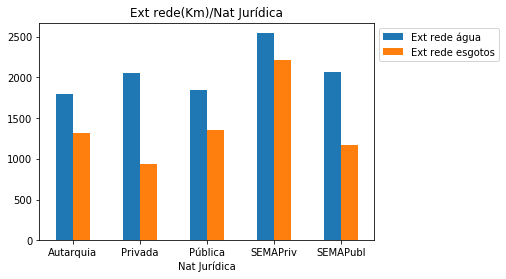

In [21]:
#grafico com a media das Ext rede por natureza
pd.DataFrame(df_san.groupby('Nat Jurídica')['Ext rede água', 
                                                      'Ext rede esgotos'].mean()).plot(kind='bar', 
                                                                                       rot=0,
                                                                                       title='Ext rede(Km)/Nat Jurídica'
                                                                                      ).get_legend().set_bbox_to_anchor((1, 1))
plt.show()

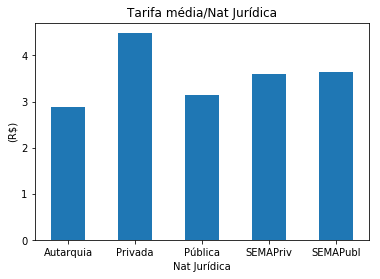

In [22]:
#Criando um gráfico de barra mostrando tarifa média por natureza
pd.DataFrame(df_san.groupby('Nat Jurídica')['Tarifa méd'].mean()).plot(kind='bar', 
                                                                                 rot=0,
                                                                                 legend=False,
                                                                                 title='Tarifa média/Nat Jurídica'
                                                                                ).set_ylabel('(R$)')
plt.show()

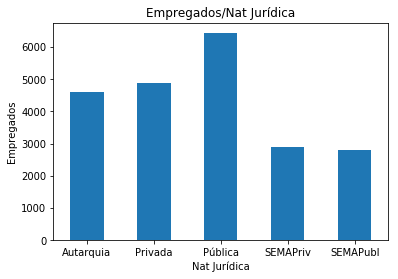

In [23]:
#grafico com a média de empregados por natureza
pd.DataFrame(df_san.groupby('Nat Jurídica')['Empregados'].mean()).plot(kind='bar', 
                                                                                 rot=0,
                                                                                 legend=False,
                                                                                 title='Empregados/Nat Jurídica'
                                                                                ).set_ylabel('Empregados')
plt.show()

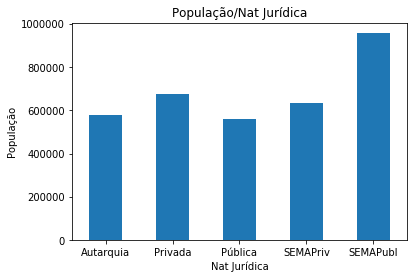

In [24]:
#grafico da media populacional por natureza
pd.DataFrame(df_san.groupby('Nat Jurídica')['Pop Total'].mean()).plot(kind='bar', 
                                                                                rot=0,
                                                                                legend=False,
                                                                                title='População/Nat Jurídica'
                                                                               ).set_ylabel('População')
plt.show()

In [25]:
# mediana da eficiencia ordenada 
df_san.groupby('Nat Jurídica')['Eficiencia_DEA'].median().sort_values(ascending=False)

Nat Jurídica
Autarquia    100.000
SEMAPriv      90.505
SEMAPubl      89.290
Privada       79.485
Pública       78.660
Name: Eficiencia_DEA, dtype: float64

In [26]:
# media da eficiencia ordenada
df_san.groupby('Nat Jurídica')['Eficiencia_DEA'].mean().sort_values(ascending=False)

Nat Jurídica
Autarquia    155.569375
SEMAPubl      84.882656
Privada       80.003750
Pública       78.660000
SEMAPriv    -828.775000
Name: Eficiencia_DEA, dtype: float64

In [27]:
df_san['Eficiencia_DEA'].describe()

count      95.000000
mean       38.606737
std       576.395807
min     -5425.940000
25%        70.810000
50%        90.680000
75%       100.000000
max      1105.490000
Name: Eficiencia_DEA, dtype: float64

In [28]:
#Geração dos dados para o mapa de calor
#Criando uma Pivot Table
mapa_de_calor = valores_df.sort_values(['Eficiencia_DEA'],ascending=False)
mapa_de_calor

Eficiencia_DEA     At Água  At Esgoto  Esg Tratado  \
Nat Jurídica                                                       
Autarquia         155.569375   97.050000  85.766875    49.350625   
SEMAPubl           84.882656   91.142187  60.247031    47.195000   
Privada            80.003750   97.575000  72.628750    63.870000   
Pública            78.660000   96.100000  95.010000     6.880000   
SEMAPriv         -828.775000  100.000000  95.875000    87.746667   

              Novas Lig Água  Novas Lig Esgoto  Perdas Fat  Perdas Dist  \
Nat Jurídica                                                              
Autarquia          61.198125         42.623750   41.961875    42.008750   
SEMAPubl           47.423750         17.721875   36.138750    43.803281   
Privada            57.391250         23.845000   28.376250    32.250000   
Pública            31.420000         35.440000   29.640000    31.520000   
SEMAPriv           99.405000         84.825000   24.695000    35.030000   

              Ev Perdas Fat  Ev Perdas Dist  
Nat Jurídica                                 
Autarquia          5.860000        6.262500  
SEMAPubl          18.348125        2.995938  
Privada            8.938750       11.208750  
Pública            0.000000        1.800000  
SEMAPriv           0.891667        0.508333

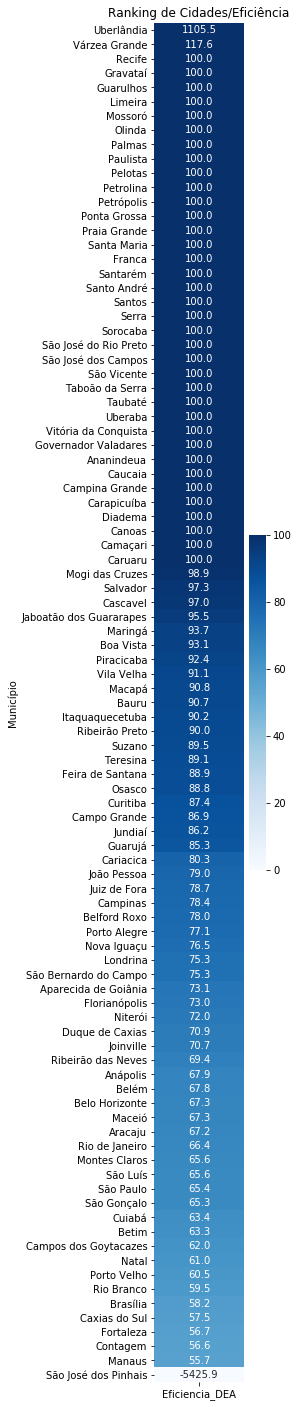

In [29]:
#Gerando o mapa de calor
plt.figure(figsize=(2, 25))
plt.title('Ranking de Cidades/Eficiência')
sns.heatmap(df_san.pivot_table(index='Município', 
                                         values='Eficiencia_DEA').sort_values(['Eficiencia_DEA'],
                                                                              ascending=False), 
            annot=True, 
            fmt='.1f', 
            cmap='Blues', 
            vmin=0, 
            vmax=100)
plt.show()

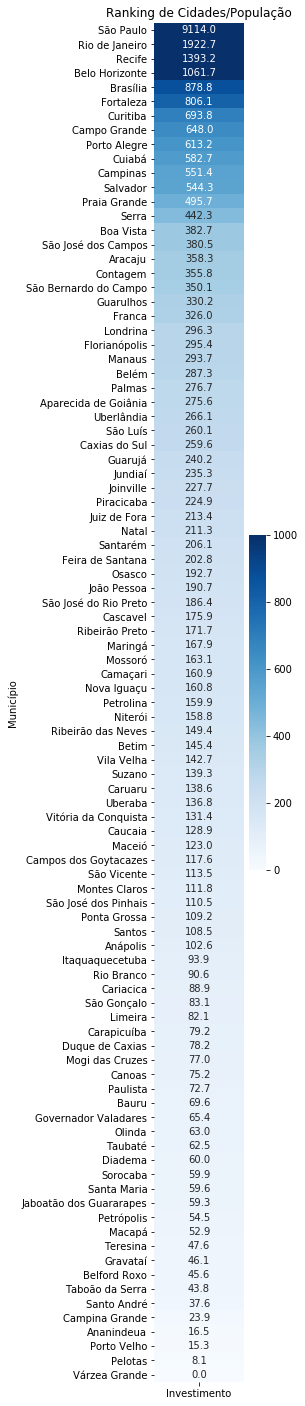

In [30]:
#Gerando o mapa de calor
plt.figure(figsize=(2, 25))
plt.title('Ranking de Cidades/População')
sns.heatmap(df_san.pivot_table(index='Município', 
                                         values='Investimento').sort_values(['Investimento'],
                                                                              ascending=False), 
            annot=True, 
            fmt='.1f', 
            cmap='Blues', 
            vmin=0, 
            vmax=1000)
plt.show()

Text(0.5,1,'Mapa de correlacao do conjunto de dados')

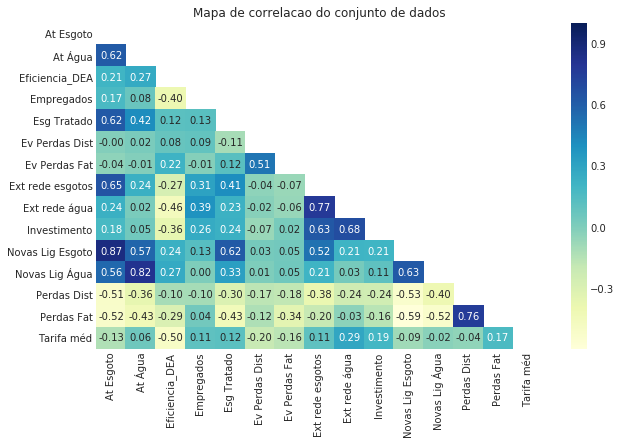

In [31]:
#Visão de correlação entre atributos percentuais das naturezas com dados escalonados
plt.figure(figsize=(10, 6))
corr = quartil_conjunto.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,
                     mask = mask, 
                     cmap='YlGnBu', 
                     annot=True, 
                     cbar=True, 
                     fmt = '.2f')
plt.title('Mapa de correlacao do conjunto de dados')

Text(0.5,1,'Medida da variabilidade dos dados')

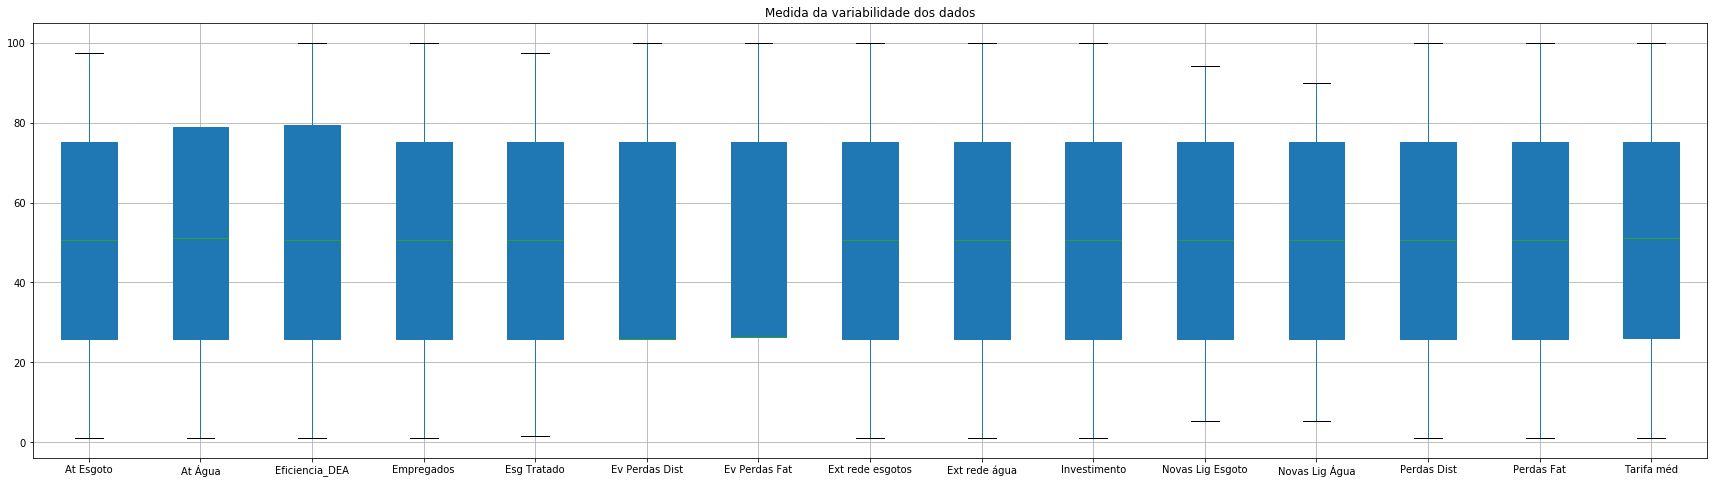

In [32]:
fig = plt.figure(figsize=(30,8))
quartil_conjunto.boxplot(whis=1.5, patch_artist=True)
plt.title('Medida da variabilidade dos dados')

Em geral, todos os atributos possuem uma variabilidade equiparada.

In [33]:
#Verificando a média e mediana dos valores
media = df_san.pivot_table(index='Nat Jurídica', values='Eficiencia_DEA', aggfunc=np.mean)
media.columns = ['MEDIA']
mediana = df_san.pivot_table(index='Nat Jurídica', values='Eficiencia_DEA', aggfunc=np.median)
mediana.columns = ['MEDIANA']

#Concatenando os DataFrames e verificando as primeiras linhas
media_mediana = pd.concat([media, mediana], axis=1)
media_mediana.head()

MEDIA  MEDIANA
Nat Jurídica                     
Autarquia     155.569375  100.000
Privada        80.003750   79.485
Pública        78.660000   78.660
SEMAPriv     -828.775000   90.505
SEMAPubl       84.882656   89.290

In [34]:
# quantidade de empresas por natureza
df_san['Nat Jurídica'].value_counts()

SEMAPubl     64
Autarquia    16
Privada       8
SEMAPriv      6
Pública       1
Name: Nat Jurídica, dtype: int64

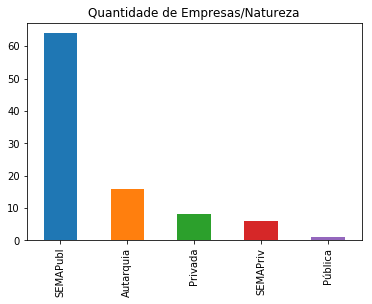

In [35]:
#Verificando a quantidade de empresas por natureza
df_san['Nat Jurídica'].value_counts().plot(kind='bar')
plt.title('Quantidade de Empresas/Natureza')
plt.show()

### Implementação: Selecionando Amostras
Para melhor compreensão das empresas de saneamento e como seus dados vão se transformar no decorrer da análise, iremos selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes.

In [36]:
# TODO: Selecione três índices como amostra do conjunto de dados
indices = [0, 1,33]

# DataFrame das amostras escolhidas
df_previsores_samples = pd.DataFrame(df_previsores.loc[indices], columns = df_previsores.keys()).reset_index(drop = True)
print ("Amostras escolhidas do conjunto de dados de saneamento:")
display(df_previsores_samples)

Amostras escolhidas do conjunto de dados de saneamento:


Perdas Fat  Perdas Dist  Tarifa méd  At Água  At Esgoto  Novas Lig Água  \
0       24.69        36.69        3.66    100.0      97.00           77.37   
1       52.41        25.36        4.16     99.0      85.16           58.78   
2       57.09        59.22        3.79    100.0      52.26           52.12   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0             57.45           0.00            0.00        61.96   
1             17.29           0.84            3.90        44.51   
2              0.48           0.00            7.02        30.90   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0           65.39       9113.98        21262.0          17101.64        4897  
1           66.43       1922.68        10891.2           4864.51        3105  
2           63.39        582.67         2523.0            905.00        6840

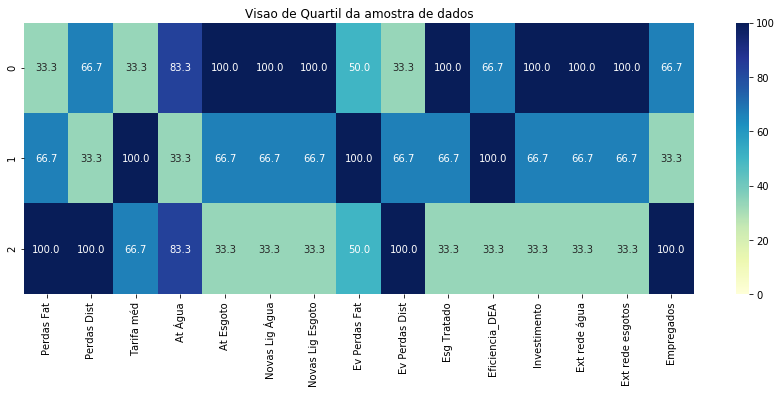

In [37]:
# Ver onde estão as amostras com relação à sua posição nos percentis
plt.figure(figsize=(15,5))
plt.title('Visao de Quartil da amostra de dados')

# Calcula a classificação percentual de dados
quartil_amostra = 100 * df_previsores_samples.rank(axis = 0, pct = True)
sns.heatmap(quartil_amostra, 
            annot = True, 
            cmap = 'YlGnBu', 
            fmt = '.1f', 
            robust = bool, 
            vmin=0, 
            vmax=100)

<font style="color:blue;">
    <p>A amostra(0) é lider, estando acima do quartil 3 nos indices de atendimento(esgoto, novas ligações de água/ligações faltantes, novas ligações de esgoto/ligações faltantes), esgoto tratado por água consumida. Também possui o maior investimento, bem como a maior extensão da rede de água e esgoto. Podemos considerar que seja a maior cidade do país. Essa amostra tem perdas faturamento, tarifa média e evolução nas perdas de distribuição abaixo do quartil 3, levando a considerar que tem um indice de perda baixo comparados com os indices de produção.
    </p>
    <p>
        A amostra(1) tem uma tarifa média alta e uma evolução de perda de faturamento também é considerada alta, ambos estão acima do quartil 3. Tem a maior parte dos indices de atendimento no quartil 3. E seus investimentos e extensão de rede de água e esgoto são equivalentes aos indices de atendimento.
    </p>
    <p>
        A amostra(2) tem alta perda nos indices de faturamento, distribuição, evolução nas perdas de distribuição. Possui muitos empregados. Mais da metade dos atributos estão abaixo do quartil 3.
    </p>
    <p>
        Tendo em vista que todas as amostras receberam investimento possivelmente são empresas de economia mista ou privada.
    </p>
</font>

### Implementação: Relevância do Atributo
Nesse bloco de código treinamos uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido por vez para pontuar quão bem o modelo pode prever o atributo removido. A função retorna a pontuação da previsão do atributo do conjunto de teste.

In [38]:
def score(atributos):
    # TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
    new_data = df_san_quartil.drop([atributos], axis = 1, inplace = False)

    # TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
    X_train, X_test, y_train, y_test = train_test_split(new_data, df_san_quartil[atributos], 
                                                        test_size = 0.25, random_state = 33)

    # TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
    regressor = DecisionTreeRegressor(random_state = 33).fit(X_train, y_train)

    # TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
    score = regressor.score(X_test, y_test)
    

    if (score < 0):
        print('O score de {} é {}(modelo falhou em ajustar os dados)'.format(atributos, np.round(score,4)))
    else:
        print('O score de {} é {}'.format(atributos, np.round(score, 4)))
        
atributos = list(df_san_quartil.columns)

for a in atributos:
    score(a)

O score de At Esgoto é 0.2004
O score de At Água é 0.7701
O score de Eficiencia_DEA é -30.6084(modelo falhou em ajustar os dados)
O score de Empregados é -1.2198(modelo falhou em ajustar os dados)
O score de Esg Tratado é -0.2169(modelo falhou em ajustar os dados)
O score de Ev Perdas Dist é -0.1268(modelo falhou em ajustar os dados)
O score de Ev Perdas Fat é -0.8245(modelo falhou em ajustar os dados)
O score de Ext rede esgotos é 0.8519
O score de Ext rede água é 0.4358
O score de Investimento é -0.1187(modelo falhou em ajustar os dados)
O score de Novas Lig Esgoto é 0.5256
O score de Novas Lig Água é 0.6784
O score de Perdas Dist é 0.4986
O score de Perdas Fat é 0.5863
O score de Tarifa méd é -0.5518(modelo falhou em ajustar os dados)


<font style="color:blue;">
    <p>
        O R^2 dos atributos de Eficiencia_DEA(-4%), Empregados(-59%), Investimento(-91%), Tarifa méd(-37) ficaram negativos, indicando que o modelo de regressão de arvore de decisão falhou ao dataset ou são falsos negativos, logo esses resultados são críticos. Os R^2 de Ev Perdas Fat(65%), Ext rede água(64%) e Perdas Fat(62%) são bons, sendo os mais fáceis de se correlacionar com as demais categorias, não são tão relevante para identificar a eficiência das empresas. Os R^2 de Esg Tratado(27%), Ev Perdas Dist(6%), Novas Lig Água(8%) quando removidos são os atributos mais importantes para prever a eficiência das empresas.</p>
</font>

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, geramos a matriz de dispersão de cada um dos 15 atributos das empresas presentes nos dados.

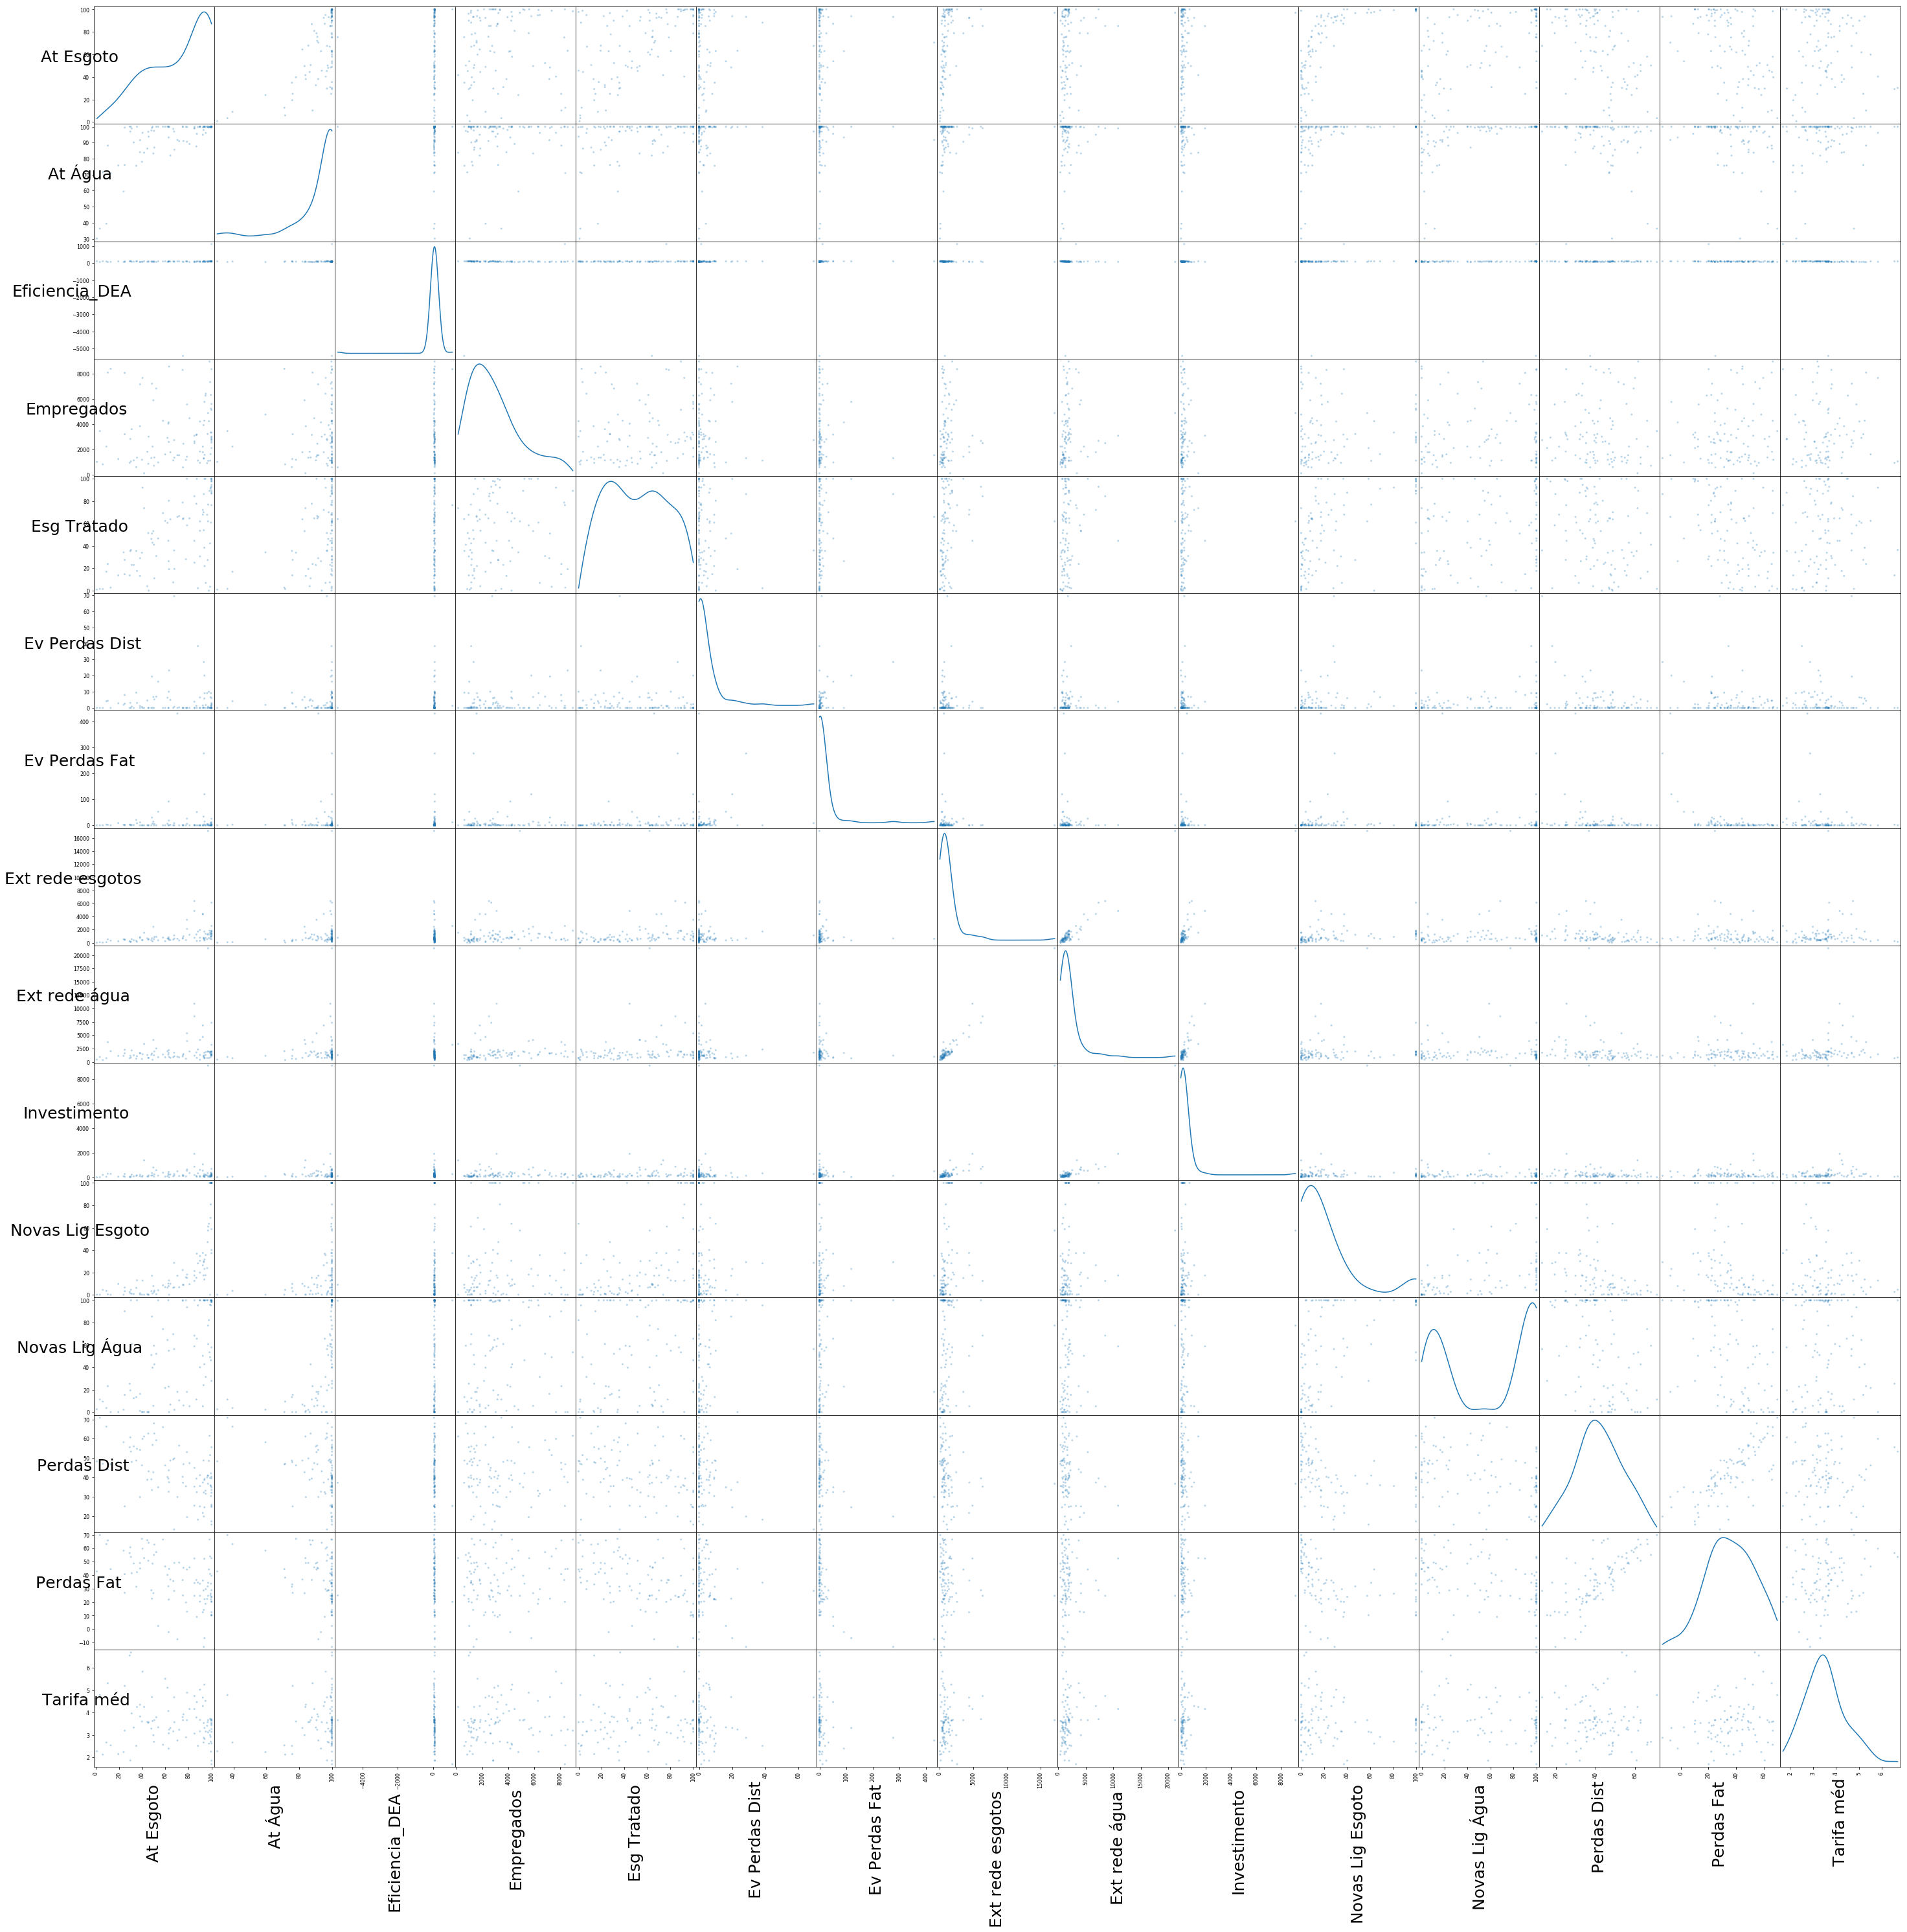

In [39]:
axs = pd.plotting.scatter_matrix(df_san_quartil, 
                           alpha = 0.3, 
                           figsize = (50,50), 
                           diagonal = 'kde')
n = len(df_san_quartil.columns)
for x in range(n):
    for y in range(n):
        # para obter o eixo das subplots
        ax = axs[x, y]
        # faz o nome do eixo x vertical  
        ax.xaxis.label.set_rotation(90)
        ax.xaxis.label.set_fontsize(25)
        # faz o nome do eixo y horizontal 
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_fontsize(25)
        # para ampliar um pouco os graficos e melhorar a visualização dos pontos foi atribuido 0
        # Para que os nomes dos eixos y fiquem fora da área de plotagem o padding bom é 50
        ax.yaxis.labelpad = 0

### Distribuição da base de dados pela matriz de dispersão

Text(0.5,1,'Correlacao entre os atributos')

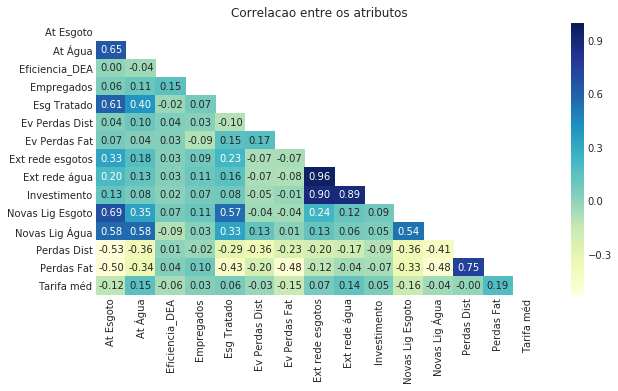

In [40]:
#Visão de correlação entre os atributos
plt.figure(figsize=(10,5))
corr = df_san_quartil.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, cmap='YlGnBu', annot=True, cbar=True, fmt = '.2f')
plt.title('Correlacao entre os atributos')

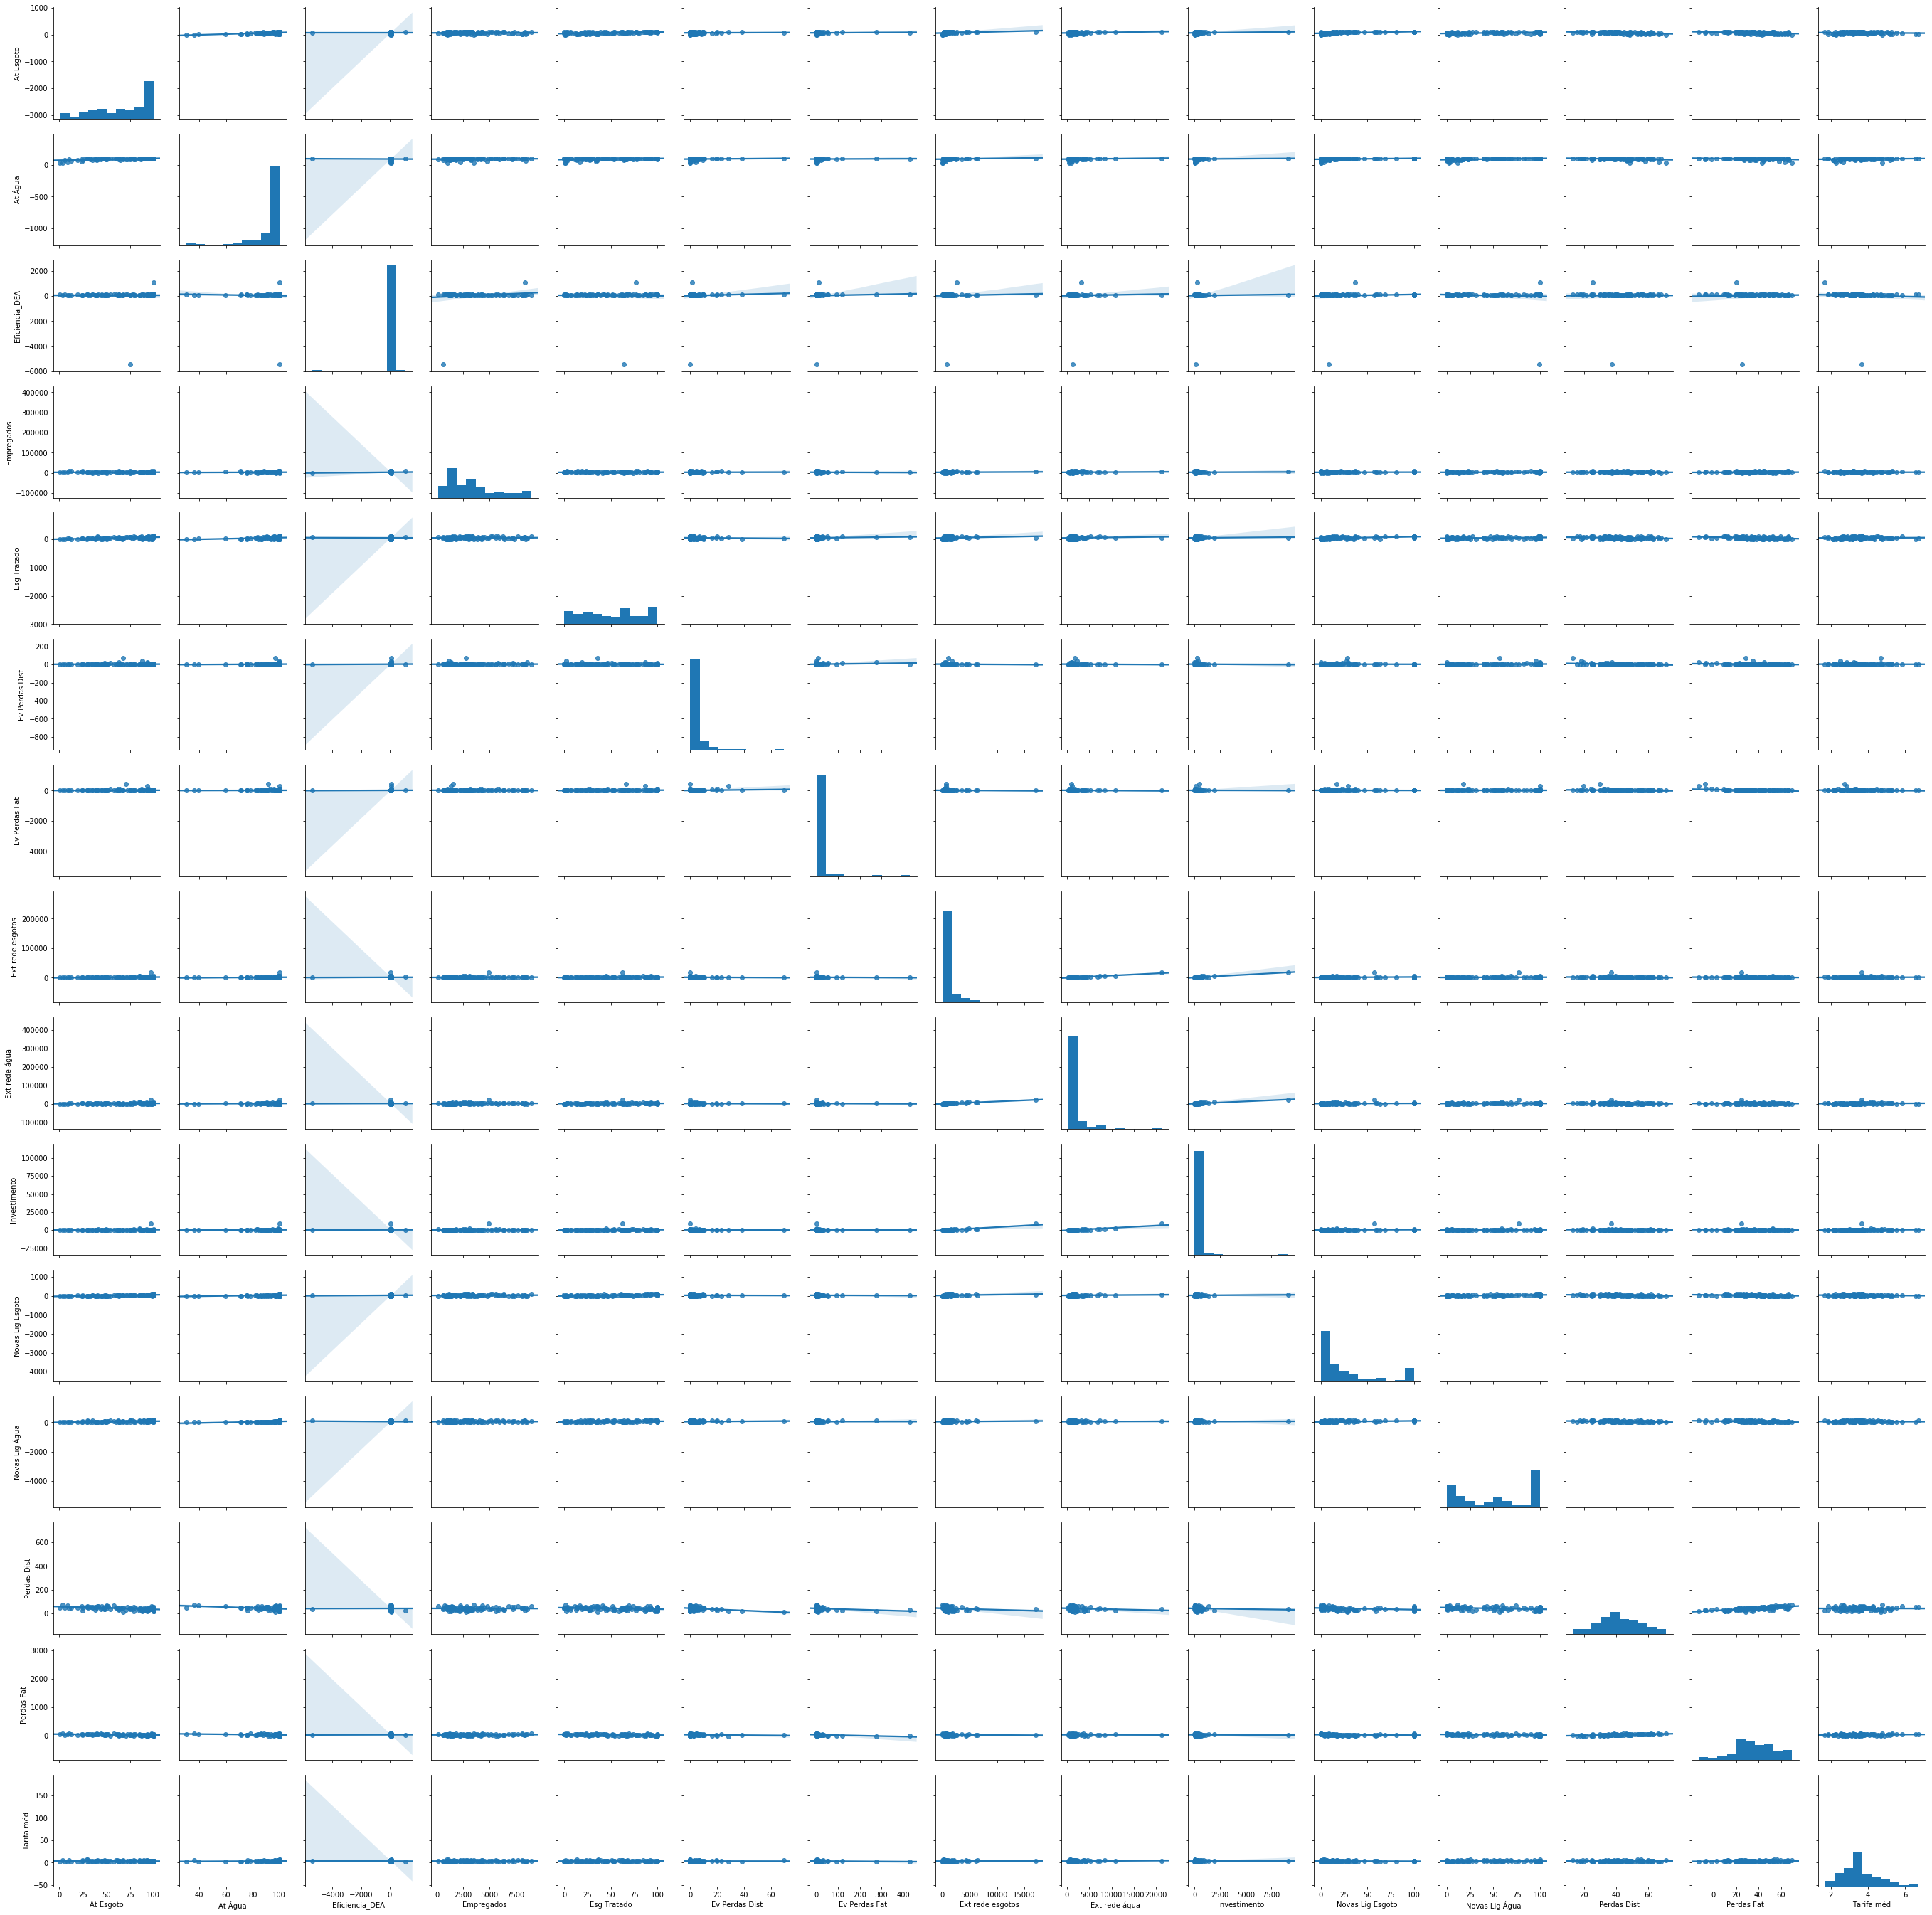

In [41]:
sns.pairplot(df_san_quartil, 
             palette="husl", 
             kind="reg")

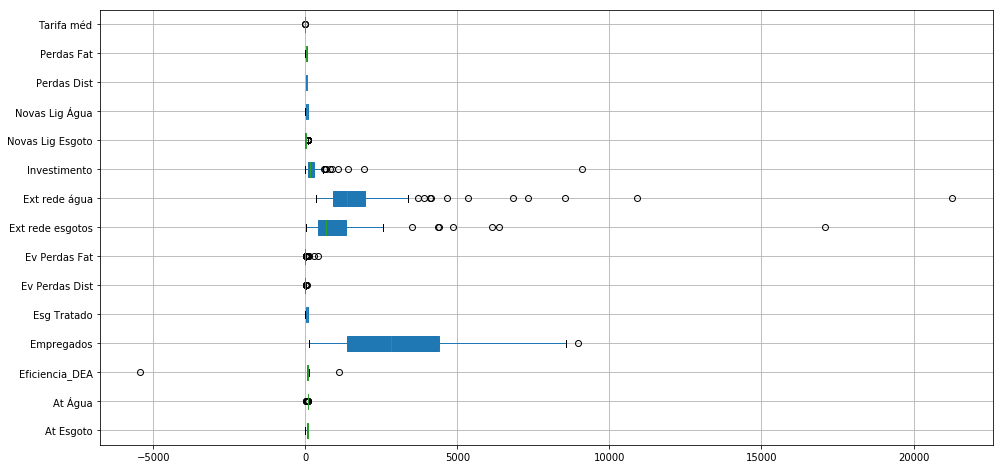

In [42]:
fig = plt.figure(figsize=(16,8))
df_san_quartil.boxplot(whis=1.5, patch_artist=True, vert=False)

**Resposta:**
<font style="color:blue;">
    <p>
    A Ext Rede Água e Ext Rede Esgoto mostram uma leve tendência linear e é o par mais correlacionado do conjunto de dados com 0.96 de coeficiente e tem um viés pequeno.
    </p>
    <p>
    Investimento também tem uma leve tendência e se correlaciona bem com Ext Rede de Esgoto com coeficiente de 0.90(mas é bem enviesada) e Ext Rede Água com coeficiênte de 0.89(pouco viés), portanto também tem pouca relevância diante do conjunto de dados para identificar a eficiência das empresas. 
    </p>
    <p>
    As Perdas Fat se correlacionam bem com as Perdas Dist com coeficiente de 0,75 e pouco viés.
    </p>
    <p>
    Como resultado, a média é maior que a mediana. Os boxplots estão enviesados à direita.
    </p>
    <p>
    O dados estão distorcidos fazendo a distribuição da base de dados está variando. A distribuição tem bastante valores discrepantes. Nas próximas fases vamos pré-processar os dados, escalonar os atributos para fazer uma distribuição normal do conjunto de dados. Isso também vai diminuir a diferença entre a média e a mediana, pois está com um desvio muito grande. A média e a mediana são muito diferentes.
    </p>
</font>

A seguir um calculo da assimetria (skew) das amostras. A distribuição é normal ou simétrica quando está próxima de zero(0). Se for mais positivo, é assimetrica à direita. E quanto mais negativo, assimétrica à esquerda. A matriz de Dispersão pode não mostrar nenhuma relação entre um atributo e os outros quando o atributo previsto for importante. Mas, se o atributo não for importante, a matriz de dispersão pode mostrar uma relação entre um atributo e os outros dos conjunto de dados.

In [43]:
# Calcular a assimetria (skew) das amostras. 
from scipy.stats import skew
skness = skew(df_san_quartil)
print(pd.DataFrame(skness))

           0
0  -0.586518
1  -3.006452
2  -9.044644
3   0.883326
4   0.017894
5   4.548433
6   6.160725
7   5.620525
8   4.980105
9   8.361396
10  1.371956
11 -0.058445
12  0.023812
13 -0.269777
14  0.765744


Pelo calculo da assimetria temos: 
- At Água com assimetria negativa,
- Eficiência e Investimento com assimetria positiva,
- Esgoto Tratado Perdas Dist simetricas.

## Pré-processamento de Dados
Nesta seção, iremos pré-processar os dados para criar uma melhor representação das empresa ao executar um escalonamento dos dados e detectando os discrepantes. assegurando que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos

In [44]:
# aplicando logaritimo natural em 4 atributos
df_previsores_ln = df_previsores[['Investimento',
                                  'Ext rede água',
                                  'Ext rede esgotos',
                                  'Empregados'
                                 ]].replace(0, 0.0001) # replace para empresas que não recebem investimentos
# TODO: Escalone os dados utilizando o algoritmo natural
df_previsores_ln = np.log(df_previsores_ln)
df_previsores_ln.head()

Investimento  Ext rede água  Ext rede esgotos  Empregados
0      9.117565       9.964677          9.746930    8.496378
1      7.561475       9.295710          8.489721    8.040769
2      6.778557       9.051871          8.760470    7.830823
3      6.299537       8.586471          8.162248    7.277248
4      6.692257       8.321825          7.800683    8.684401

In [45]:
# aplicando ln para os previsores samples
df_previsores_samples_ln = df_previsores_samples[['Investimento',
                                  'Ext rede água',
                                  'Ext rede esgotos',
                                  'Empregados'
                                 ]].replace(0, 0.0001) # replace para empresas que não recebem investimentos
# TODO: Escalone os dados utilizando o algoritmo natural
df_previsores_samples_ln = np.log(df_previsores_samples_ln)
df_previsores_samples_ln.head()

Investimento  Ext rede água  Ext rede esgotos  Empregados
0      9.117565       9.964677          9.746930    8.496378
1      7.561475       9.295710          8.489721    8.040769
2      6.367621       7.833204          6.807935    8.830543

In [46]:
# remove esses atributos do df previsores para depois fazer um join com np.log aplicado neles
df_previsores_novo = df_previsores.drop(columns=['Investimento', 
                                                 'Ext rede água',
                                                 'Ext rede esgotos',
                                                 'Empregados'
                                    ])
# dobo df de previsores com algumas colunas em log nat
df_previsores_novo = df_previsores_novo.join(df_previsores_ln)
df_previsores_novo.head()

Perdas Fat  Perdas Dist  Tarifa méd  At Água  At Esgoto  Novas Lig Água  \
0       24.69        36.69        3.66    100.0      97.00           77.37   
1       52.41        25.36        4.16     99.0      85.16           58.78   
2       24.71        35.21        4.74     99.1      85.23           68.48   
3       44.19        53.07        3.66     90.6      78.77           18.01   
4       26.66        42.64        2.99     83.3      49.68            5.61   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0             57.45           0.00            0.00        61.96   
1             17.29           0.84            3.90        44.51   
2             12.41           0.88            0.00        84.42   
3             14.92          25.82            0.00       100.00   
4              7.77          14.36            6.78        53.19   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0           65.39      9.117565       9.964677          9.746930    8.496378  
1           66.43      7.561475       9.295710          8.489721    8.040769  
2           58.17      6.778557       9.051871          8.760470    7.830823  
3           97.30      6.299537       8.586471          8.162248    7.277248  
4           56.74      6.692257       8.321825          7.800683    8.684401

In [47]:
# remove esses atributos do df samples para depois fazer um join com np.log aplicado neles
df_previsores_samples_novo = df_previsores_samples.drop(columns=['Investimento', 
                                                 'Ext rede água',
                                                 'Ext rede esgotos',
                                                 'Empregados'
                                    ])
# um df de amostra com algumas colunas normalizadas por log nat
df_previsores_samples_novo = df_previsores_samples_novo.join(df_previsores_samples_ln)
df_previsores_samples_novo.head()

Perdas Fat  Perdas Dist  Tarifa méd  At Água  At Esgoto  Novas Lig Água  \
0       24.69        36.69        3.66    100.0      97.00           77.37   
1       52.41        25.36        4.16     99.0      85.16           58.78   
2       57.09        59.22        3.79    100.0      52.26           52.12   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0             57.45           0.00            0.00        61.96   
1             17.29           0.84            3.90        44.51   
2              0.48           0.00            7.02        30.90   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0           65.39      9.117565       9.964677          9.746930    8.496378  
1           66.43      7.561475       9.295710          8.489721    8.040769  
2           63.39      6.367621       7.833204          6.807935    8.830543

In [48]:
df_previsores_novo.shape

(95, 15)

In [49]:
# Escalondo os dados
# Transformas os dados para fazer com que a variância de cada atributo seja unitária para o modelo performar melhor
scaler = StandardScaler()
scaler.fit(df_previsores_novo)

scaled_data = scaler.transform(df_previsores_novo)

scaled_data_samples = scaler.transform(df_previsores_samples_novo)

df_scaled_data = pd.DataFrame(scaled_data)

df_scaled_data_samples = pd.DataFrame(scaled_data_samples)

#  Renomear colunas dos df_scaled_data escalonados
df_scaled_data.columns = ['Perdas Fat', 
                          'Perdas Dist', 
                          'Tarifa méd',
                          'At Água', 
                          'At Esgoto',
                          'Novas Lig Água', 
                          'Novas Lig Esgoto', 
                          'Ev Perdas Fat', 
                          'Ev Perdas Dist',
                          'Esg Tratado',  
                          'Eficiencia_DEA',
                          'Investimento',
                          'Ext rede água',
                          'Ext rede esgotos',
                          'Empregados'
                       ]
#  Renomear colunas dos df_scaled_data_samples escalonados
df_scaled_data_samples.columns = ['Perdas Fat', 
                          'Perdas Dist', 
                          'Tarifa méd',
                          'At Água', 
                          'At Esgoto',
                          'Novas Lig Água', 
                          'Novas Lig Esgoto', 
                          'Ev Perdas Fat', 
                          'Ev Perdas Dist',
                          'Esg Tratado',  
                          'Eficiencia_DEA',
                          'Investimento',
                          'Ext rede água',
                          'Ext rede esgotos',
                          'Empregados'
                       ]

df_scaled_data.head()

Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0   -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
1    0.915040    -1.290252    0.607582  0.431364   0.580661        0.129712   
2   -0.599513    -0.519298    1.205933  0.438919   0.583058        0.377273   
3    0.465595     0.878596    0.091762 -0.203275   0.361836       -0.910809   
4   -0.492893     0.062245   -0.599437 -0.754807  -0.634350       -1.227279   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0          0.940444      -0.262217       -0.437521     0.344721   
1         -0.294058      -0.246659       -0.018069    -0.209133   
2         -0.444068      -0.245918       -0.437521     1.057591   
3         -0.366911       0.216029       -0.437521     1.552092   
4         -0.586699       0.003763        0.291680     0.066366   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0        0.046713      2.325160       3.789932          3.003657    0.841060  
1        0.048527      1.458984       2.838261          1.814404    0.250806  
2        0.034121      1.023184       2.491376          2.070518   -0.021184  
3        0.102368      0.756545       1.829298          1.504632   -0.738355  
4        0.031627      0.975147       1.452814          1.162610    1.084649

In [50]:
df_scaled_data_samples.head()

Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0   -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
1    0.915040    -1.290252    0.607582  0.431364   0.580661        0.129712   
2    1.170928     1.359953    0.225875  0.506916  -0.545998       -0.040263   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0          0.940444      -0.262217       -0.437521     0.344721   
1         -0.294058      -0.246659       -0.018069    -0.209133   
2         -0.810791      -0.262217        0.317493    -0.641108   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0        0.046713      2.325160       3.789932          3.003657    0.841060  
1        0.048527      1.458984       2.838261          1.814404    0.250806  
2        0.043225      0.794442       0.757702          0.223522    1.273979

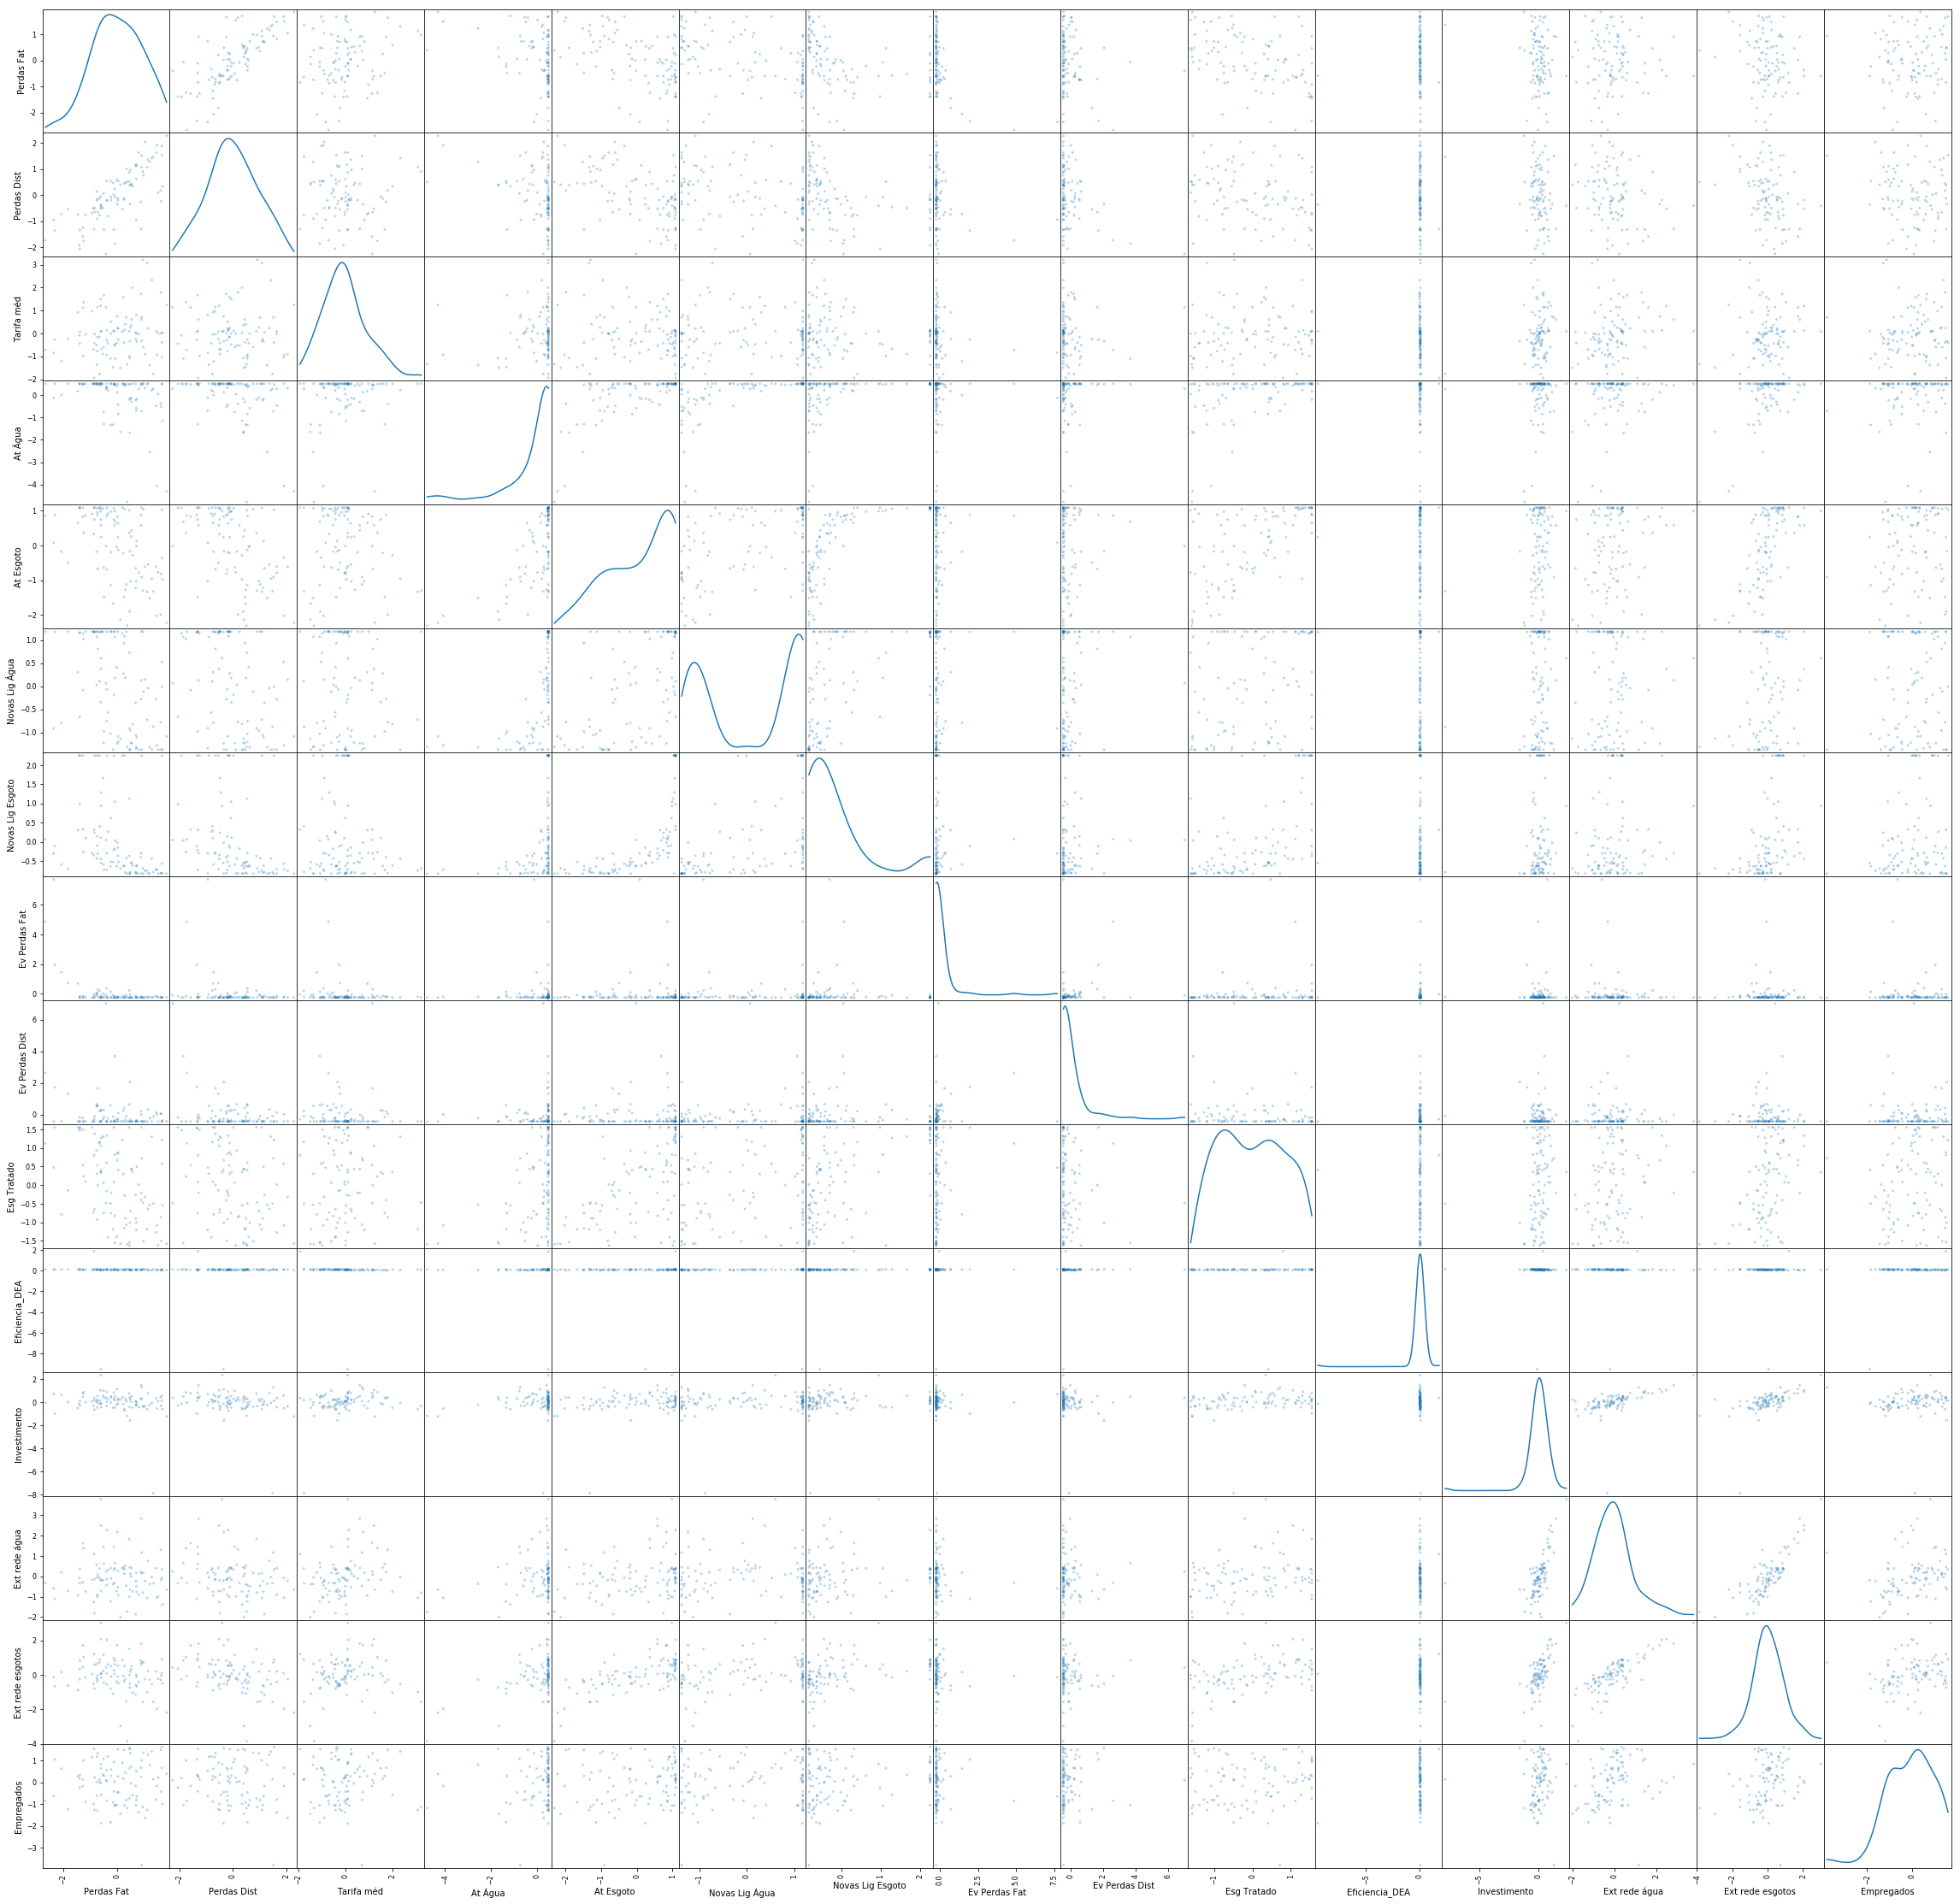

In [51]:
# Matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(df_scaled_data,
                           alpha = 0.3, 
                           figsize = (40,40), 
                           diagonal = 'kde', 
                           cmap='YlGnBu');

Text(0.5,1,'Nova visão de correlação entre atributos')

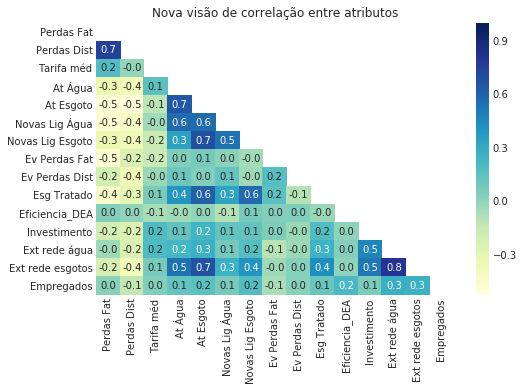

In [52]:
#Visão de correlação entre os atributos das empresas depois da normalização
plt.figure(figsize = (8,5))
corr = df_scaled_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask = mask, 
                     cmap='YlGnBu',
                     fmt = '.1f', 
                     annot=True,
                     cbar=True
                    )
plt.title('Nova visão de correlação entre atributos')

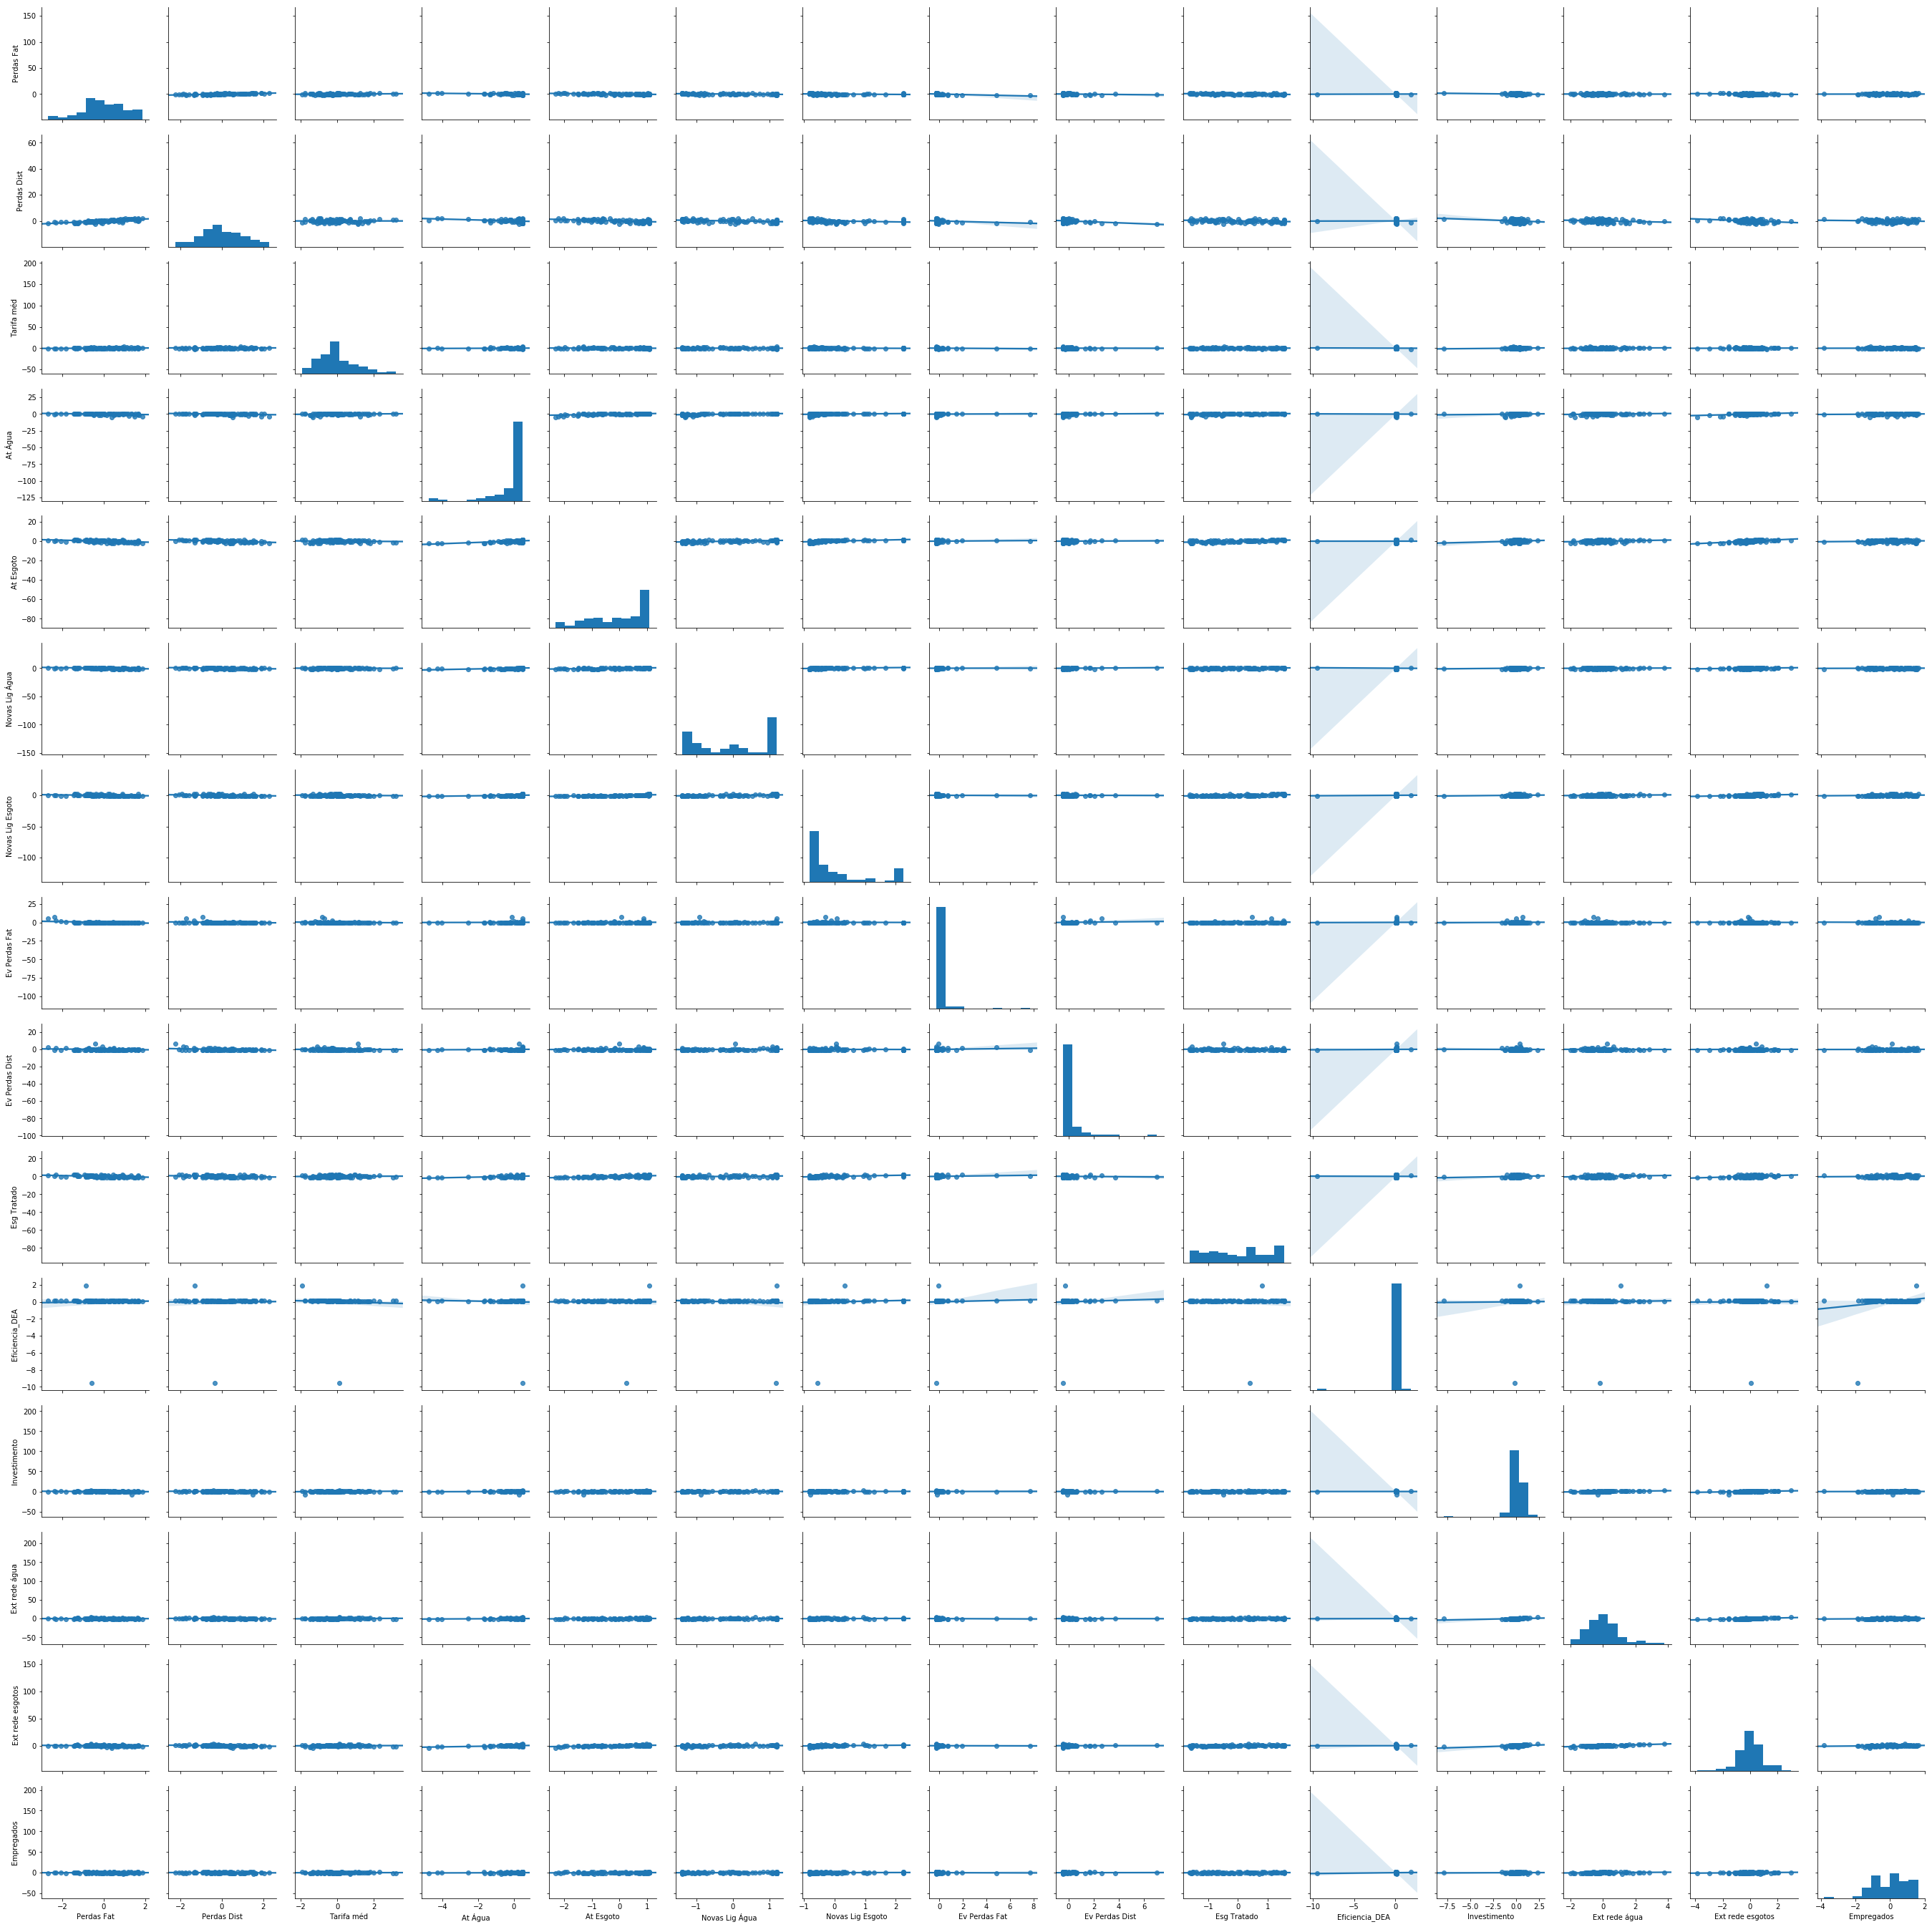

In [53]:
# pairplot para cada par de atributos
sns.pairplot(df_scaled_data, palette="husl", kind="reg");

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, observe nos proximos gráficos essa correlação.

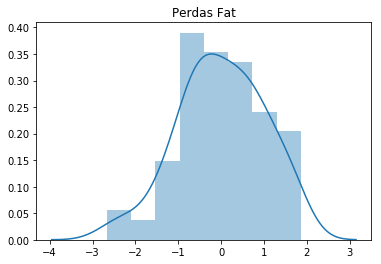

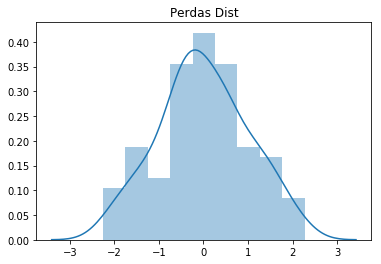

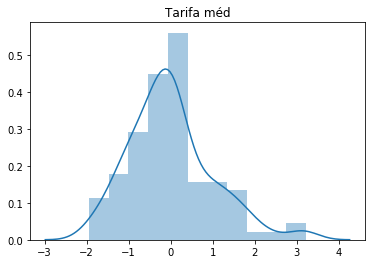

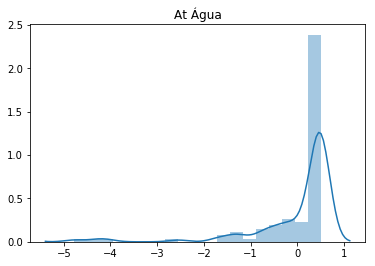

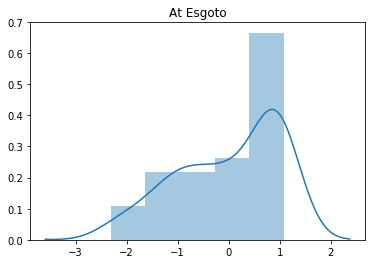

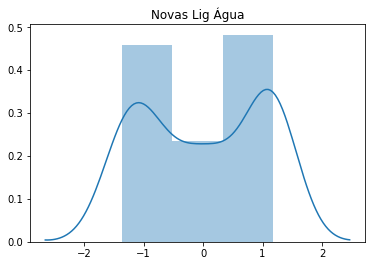

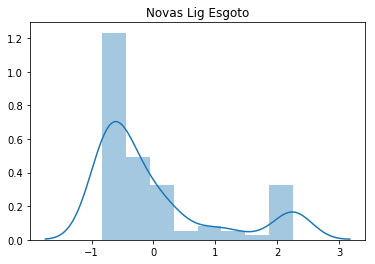

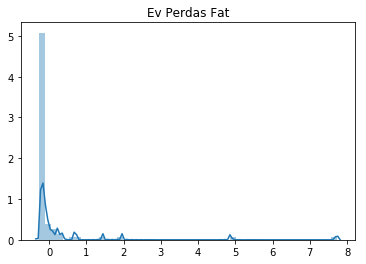

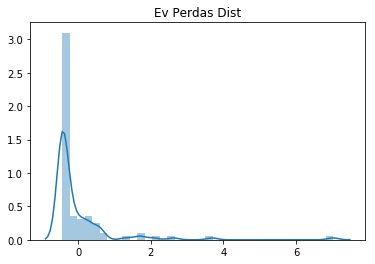

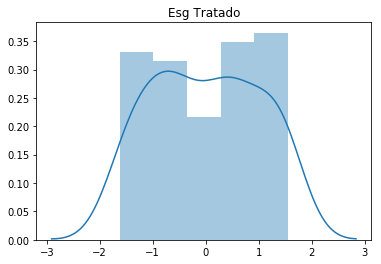

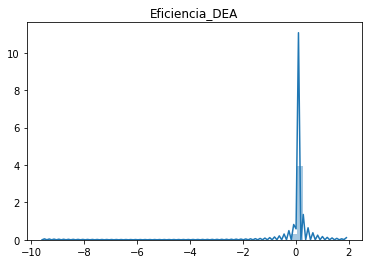

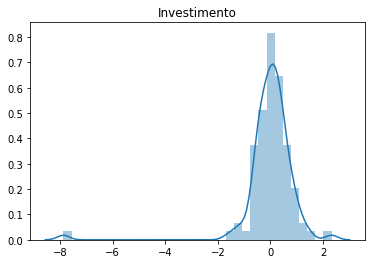

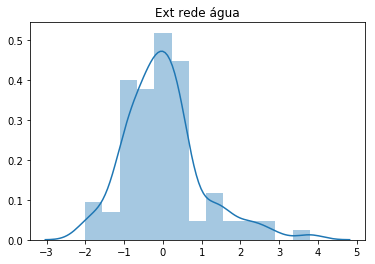

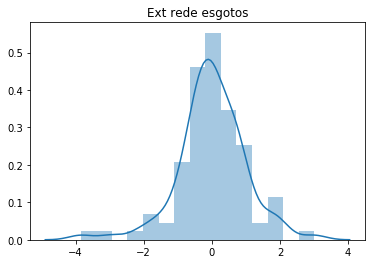

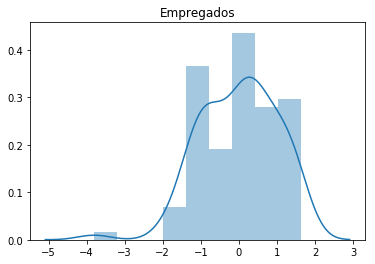

In [54]:
for column in df_previsores_novo.columns.values:
    centered_scaled_data = preprocessing.scale(df_previsores_novo[column])
    plt.figure()
    plt.title(column)
    sns.distplot(centered_scaled_data)

### Implementação: Detecção de Discrepantes
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Tukey para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** os outliers não viesam negativamente o resultado da análise e o seu comportamento não é o foco dessa analise. Portanto não serão excluidos.  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [55]:
# Lista das outliers
outliers = []

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in df_scaled_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(df_scaled_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(df_scaled_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5 * (Q3 - Q1)
    #print "Outlier step:", step
    print ('Passo do discrepante: {}'.format(step))
    feature_outliers = df_scaled_data[~((df_scaled_data[feature] >= Q1 - step) & (df_scaled_data[feature] <= Q3 + step))]
    # Mostre os discrepantes
    print ('{} Pontos de dados considerados discrepantes para o atributo {}:'.format(len(feature_outliers), feature))

    display(feature_outliers)
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover caso contrario deixe outliers vazio para os graficos de visualização
    #outliers += feature_outliers.index.tolist()
    outliers = []

# lista de outliers duplicados
duplicados = list(set([x for x in outliers if outliers.count(x) > 1]))    

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = df_scaled_data.drop(df_scaled_data.index[outliers]).reset_index(drop = True)
#good_data = df_scaled_data

print ('O conjunto de dados com valores discrepantes removidos tem {} amostras de dados.'.format(len(good_data))) # é bom traduzir
print ('Foram identificados {} passos discrepantes, sendo que {} se repetiram, para fins de contas da amostra de dados acima.'.format(len(outliers), len(duplicados)))

Passo do discrepante: 2.067201231484396
0 Pontos de dados considerados discrepantes para o atributo Perdas Fat:


Empty DataFrame
Columns: [Perdas Fat, Perdas Dist, Tarifa méd, At Água, At Esgoto, Novas Lig Água, Novas Lig Esgoto, Ev Perdas Fat, Ev Perdas Dist, Esg Tratado, Eficiencia_DEA, Investimento, Ext rede água, Ext rede esgotos, Empregados]
Index: []

Passo do discrepante: 1.8238749574669597
0 Pontos de dados considerados discrepantes para o atributo Perdas Dist:


Empty DataFrame
Columns: [Perdas Fat, Perdas Dist, Tarifa méd, At Água, At Esgoto, Novas Lig Água, Novas Lig Esgoto, Ev Perdas Fat, Ev Perdas Dist, Esg Tratado, Eficiencia_DEA, Investimento, Ext rede água, Ext rede esgotos, Empregados]
Index: []

Passo do discrepante: 1.6480452517579076
3 Pontos de dados considerados discrepantes para o atributo Tarifa méd:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
15    1.310902     1.415524    2.330421  0.219817  -0.953855       -1.370456   
71    0.978465     0.902859    3.217632  0.506916  -1.299729        1.181719   
93    1.134295     1.075835    3.073202  0.506916  -1.334658       -0.722714   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
15         -0.434538      -0.262217       -0.437521     1.301033   
71         -0.688448      -0.262217       -0.437521    -0.471619   
93         -0.745623      -0.213504       -0.437521    -1.190519   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
15        0.050097     -0.071415      -0.036154         -0.531174    1.424042  
71        0.107077     -0.345179      -0.798618         -1.570427   -1.129389  
93        0.107077     -0.617274      -1.064986         -1.013298   -1.269929

Passo do discrepante: 0.9802907598650219
10 Pontos de dados considerados discrepantes para o atributo At Água:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
10    0.481998     0.385498   -1.073992 -1.684100  -1.899700       -1.370456   
26   -0.138039     0.470812   -1.476331 -1.321449  -1.672314       -1.370456   
37   -0.479771    -1.319212    1.670171 -1.298783  -1.480884       -0.976656   
38    1.864233     2.272575    1.247199 -4.305764  -2.219890       -1.082571   
39    0.389594     0.505250   -1.342218 -4.774188  -2.309954       -1.306141   
41    1.710044     0.340102    0.029863 -1.147679  -0.972690       -1.370456   
47    1.497350     1.910188   -0.939879 -4.071552  -2.026064       -1.278578   
61    1.231073     1.279336   -1.383484 -2.552951  -1.515129       -1.315074   
64   -0.232631     0.535775   -1.094625 -1.336559  -1.140147       -1.027699   
85    0.138626     0.402717   -1.496964 -1.646324  -2.134963       -1.130297   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
10         -0.825546      -0.262217       -0.437521    -1.537114   
26         -0.527987      -0.101073       -0.123469    -1.189567   
37         -0.730253      -0.220542       -0.150357    -0.750927   
38         -0.825546      -0.262217       -0.437521    -1.572980   
39         -0.825546      -0.262217       -0.437521    -1.592976   
41         -0.822780      -0.257587       -0.367612    -0.545572   
47         -0.720417      -0.212578        0.012046    -1.086413   
61         -0.825546      -0.228322       -0.234248    -0.534781   
64         -0.637420       0.125084        0.583146    -0.494472   
85         -0.690907      -0.262217       -0.437521    -1.577741   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
10        0.050952      0.400771       0.446454         -0.736540    1.540137  
26        0.099194     -0.477383      -0.384068         -1.082669   -0.917631  
37        0.060143      0.377766       0.613793         -0.438072    0.297922  
38        0.038097     -1.230856      -0.648379         -2.195279    0.394792  
39        0.107077     -1.188879      -1.733118         -3.848651   -1.178748  
41        0.068776     -0.624072      -1.388856         -0.507178   -0.980840  
47        0.091084     -0.541469      -1.050361         -1.967335   -0.166461  
61        0.036440     -0.241734      -0.373139         -0.276441    0.809731  
64        0.107077     -0.045246      -1.239261         -0.801969   -1.836350  
85        0.107077      0.215845      -2.008294         -2.968056   -1.442922

Passo do discrepante: 2.540631672000767
0 Pontos de dados considerados discrepantes para o atributo At Esgoto:


Empty DataFrame
Columns: [Perdas Fat, Perdas Dist, Tarifa méd, At Água, At Esgoto, Novas Lig Água, Novas Lig Esgoto, Ev Perdas Fat, Ev Perdas Dist, Esg Tratado, Eficiencia_DEA, Investimento, Ext rede água, Ext rede esgotos, Empregados]
Index: []

Passo do discrepante: 3.309341569106052
0 Pontos de dados considerados discrepantes para o atributo Novas Lig Água:


Empty DataFrame
Columns: [Perdas Fat, Perdas Dist, Tarifa méd, At Água, At Esgoto, Novas Lig Água, Novas Lig Esgoto, Ev Perdas Fat, Ev Perdas Dist, Esg Tratado, Eficiencia_DEA, Investimento, Ext rede água, Ext rede esgotos, Empregados]
Index: []

Passo do discrepante: 1.4535993925811292
12 Pontos de dados considerados discrepantes para o atributo Novas Lig Esgoto:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
7    -0.370417    -0.186652    0.133027  0.506916   1.088513        1.181719   
23    0.288441    -0.167867    0.153660  0.499361   1.046734        1.080397   
27    1.685986     1.536842   -0.393109  0.484250   1.029954       -0.005043   
36    0.212987    -0.543561    0.081445  0.506916   1.088513        1.140374   
49   -1.397251    -1.925018   -0.083617  0.506916   1.087143        1.148541   
54   -0.109607     0.018414    0.112394  0.469140   1.071733       -0.187013   
55   -1.379208    -1.337996    0.071129  0.506916   1.088513        1.163854   
58    0.926522     1.075835   -0.320894  0.506916   1.088856        1.181719   
69   -1.266573    -1.251900   -0.981144  0.506916   1.088856        1.143947   
72   -0.650363    -0.121688   -0.145516  0.506916   1.088513        1.173552   
77   -0.743314    -0.901253   -1.362851  0.506916   1.071733        1.068913   
78   -0.830797    -0.650790   -0.032035  0.506916   1.088856        1.167682   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
7           2.248415      -0.262217       -0.437521     1.327694   
23          2.248415      -0.262217       -0.437521    -0.281182   
27          2.248415      -0.262217       -0.437521     1.210258   
36          2.248415      -0.262217       -0.437521     1.210258   
49          2.248415      -0.262217       -0.437521     1.476870   
54          2.248415      -0.262217       -0.437521     1.552092   
55          2.248415      -0.262217       -0.437521     1.522892   
58          2.248415      -0.262217       -0.437521     1.552092   
69          2.248415      -0.222950       -0.207360     1.489565   
72          2.248415      -0.262217       -0.437521     1.130274   
77          2.248415      -0.061991        0.548729     0.307586   
78          2.248415      -0.163123       -0.109488     1.379747   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
7         0.085032      0.891578       2.274460          2.033341    0.066378  
23        0.107077     -0.730787       0.344304          0.529476   -1.052987  
27        0.089549      0.114434       0.336252          0.899256    1.626637  
36        0.064050      0.418056       0.406357          0.862457    0.906321  
49        0.107077     -0.141447      -0.081935         -0.262798    0.188849  
54        0.083043      0.289707       0.325061          0.267093    0.931235  
55        0.096002      0.102013       0.363373          0.832968    0.349197  
58        0.093805      0.264445       0.151785          0.629111    1.019465  
69        0.107077      0.471174      -0.297728          0.449505    0.126077  
72        0.107077     -0.137815      -0.064080          0.723906    0.000761  
77        0.107077     -0.012261      -0.050441          0.639335    1.173592  
78        0.101758      0.127820      -0.133620          0.592592    0.219129

Passo do discrepante: 0.15489276071800498
14 Pontos de dados considerados discrepantes para o atributo Ev Perdas Fat:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
3     0.465595     0.878596    0.091762 -0.203275   0.361836       -0.910809   
4    -0.492893     0.062245   -0.599437 -0.754807  -0.634350       -1.227279   
31   -0.714882    -0.657052    1.154351  0.454029  -0.675443        0.810633   
32   -0.753156     0.141297   -0.516906  0.506916  -0.177180        0.031454   
42   -2.069778    -0.726712   -1.218421  0.000716  -0.180604       -0.789581   
48   -0.642708    -0.770543   -1.775507  0.506916   1.088856        0.107508   
50   -0.380258     0.538906   -0.939879  0.355811   0.852565       -0.754616   
52   -0.736206    -0.205437   -0.774816  0.506916   0.883386        1.181719   
53   -2.319652    -1.355216   -0.269312  0.506916   0.879961        1.175849   
64   -0.232631     0.535775   -1.094625 -1.336559  -1.140147       -1.027699   
67   -1.822091    -0.546692   -0.238363  0.506916  -0.491206        1.181719   
68   -2.669038    -1.728561   -0.723234  0.506916   0.860442        1.181719   
81   -2.361207    -0.938822   -0.847031 -0.120168   0.079315       -0.909533   
84   -1.455209    -0.742366    0.927390  0.174486   0.651890        0.305302   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
3          -0.366911       0.216029       -0.437521     1.552092   
4          -0.586699       0.003763        0.291680     0.066366   
31         -0.302973       0.294378        1.656512    -0.001557   
32         -0.429927       0.078223        0.649828     0.929680   
42         -0.586085       1.437760       -0.437521    -0.787745   
48          0.406497       0.207323        0.217470     1.157570   
50         -0.292829       0.359021       -0.416010     0.602763   
52          0.144289       0.007838        0.544427    -0.924225   
53         -0.114539       1.953050        1.723194     1.548601   
64         -0.637420       0.125084        0.583146    -0.494472   
67         -0.702895       0.705203        1.316649    -0.140893   
68          0.070513       4.868831        2.623403     1.119165   
81         -0.301436       7.718302       -0.437521     0.470092   
84          0.304134       0.686680       -0.437521     1.552092   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
3         0.102368      0.756545       1.829298          1.504632   -0.738355  
4         0.031627      0.975147       1.452814          1.162610    1.084649  
31        0.049800      0.523716       0.085638         -0.036218    1.344025  
32        0.087700      0.207078       0.566467         -0.170247    0.025821  
42        0.107077      0.641053       0.188858          0.161984    0.629749  
48        0.107077      0.160060       0.383899          0.890632    0.130663  
50        0.105124     -0.331797      -0.438857          0.079270    0.559358  
52        0.107077     -0.470759      -0.907694         -0.381190   -0.616263  
53        0.107077     -0.983775      -1.103681         -0.665664    1.055833  
64        0.107077     -0.045246      -1.239261         -0.801969   -1.836350  
67        0.107077     -0.004822      -0.730387         -0.624688   -1.230063  
68        0.107077     -0.034767      -0.314187         -0.067898   -0.847586  
81        0.107077      0.704496      -0.593108         -0.143726   -0.640940  
84        0.107077     -0.524871      -0.939925         -0.896402    0.285795

Passo do discrepante: 0.7283943436298259
7 Pontos de dados considerados discrepantes para o atributo Ev Perdas Dist:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
11   -0.064772    -1.856141   -1.094625  0.491806   0.686478        1.066871   
31   -0.714882    -0.657052    1.154351  0.454029  -0.675443        0.810633   
53   -2.319652    -1.355216   -0.269312  0.506916   0.879961        1.175849   
67   -1.822091    -0.546692   -0.238363  0.506916  -0.491206        1.181719   
68   -2.669038    -1.728561   -0.723234  0.506916   0.860442        1.181719   
70    0.490746    -0.341626   -0.341527  0.491806  -0.168276       -1.370456   
89   -0.402676    -2.253750    1.144035  0.280259  -0.019995        0.068460   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
11          0.037007      -0.262217        3.690316    -1.554571   
31         -0.302973       0.294378        1.656512    -0.001557   
53         -0.114539       1.953050        1.723194     1.548601   
67         -0.702895       0.705203        1.316649    -0.140893   
68          0.070513       4.868831        2.623403     1.119165   
70         -0.825546      -0.262217        2.064134    -1.012460   
89          0.051455      -0.104778        7.021194    -0.482411   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
11        0.107077      0.478401       0.644704          0.830935   -1.050706  
31        0.049800      0.523716       0.085638         -0.036218    1.344025  
53        0.107077     -0.983775      -1.103681         -0.665664    1.055833  
67        0.107077     -0.004822      -0.730387         -0.624688   -1.230063  
68        0.107077     -0.034767      -0.314187         -0.067898   -0.847586  
70        0.107077     -1.585597      -0.644385         -0.514334    1.567605  
89        0.107077      0.379923       0.235999          0.425353    0.098215

Passo do discrepante: 2.520434596947794
0 Pontos de dados considerados discrepantes para o atributo Esg Tratado:


Empty DataFrame
Columns: [Perdas Fat, Perdas Dist, Tarifa méd, At Água, At Esgoto, Novas Lig Água, Novas Lig Esgoto, Ev Perdas Fat, Ev Perdas Dist, Esg Tratado, Eficiencia_DEA, Investimento, Ext rede água, Ext rede esgotos, Empregados]
Index: []

Passo do discrepante: 0.07636641745145545
2 Pontos de dados considerados discrepantes para o atributo Eficiencia_DEA:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
28   -0.846107    -1.302775   -1.940570  0.506916   1.088856        1.181719   
82   -0.584204    -0.359628    0.091762  0.506916   0.242663        1.172021   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
28          0.318275      -0.046803       -0.294477     0.804309   
82         -0.550427      -0.262217       -0.437521     0.408200   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
28        1.860775      0.358075       1.098521          1.211201    1.535502  
82       -9.530841     -0.130923      -0.202100          0.056139   -1.878831

Passo do discrepante: 1.090128046396018
3 Pontos de dados considerados discrepantes para o atributo Investimento:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0    -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
70    0.490746    -0.341626   -0.341527  0.491806  -0.168276       -1.370456   
94    1.368312     1.475792   -1.765191  0.280259  -1.317536       -0.873803   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0           0.940444      -0.262217       -0.437521     0.344721   
70         -0.825546      -0.262217        2.064134    -1.012460   
94         -0.787429      -0.217579       -0.101959    -0.498598   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0         0.046713      2.325160       3.789932          3.003657    0.841060  
70        0.107077     -1.585597      -0.644385         -0.514334    1.567605  
94        0.137757     -7.876809      -0.343902         -1.565842    0.139787

Passo do discrepante: 1.62217300738847
5 Pontos de dados considerados discrepantes para o atributo Ext rede água:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0   -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
1    0.915040    -1.290252    0.607582  0.431364   0.580661        0.129712   
2   -0.599513    -0.519298    1.205933  0.438919   0.583058        0.377273   
5    0.019430    -0.351018    0.741695  0.129155   0.831676       -1.236977   
7   -0.370417    -0.186652    0.133027  0.506916   1.088513        1.181719   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0          0.940444      -0.262217       -0.437521     0.344721   
1         -0.294058      -0.246659       -0.018069    -0.209133   
2         -0.444068      -0.245918       -0.437521     1.057591   
5         -0.016787      -0.262217       -0.270815     0.668464   
7          2.248415      -0.262217       -0.437521     1.327694   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0        0.046713      2.325160       3.789932          3.003657    0.841060  
1        0.048527      1.458984       2.838261          1.814404    0.250806  
2        0.034121      1.023184       2.491376          2.070518   -0.021184  
5        0.050114      1.128438       2.175997          1.718015   -0.454111  
7        0.085032      0.891578       2.274460          2.033341    0.066378

Passo do discrepante: 1.6473835984767655
4 Pontos de dados considerados discrepantes para o atributo Ext rede esgotos:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0    -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
38    1.864233     2.272575    1.247199 -4.305764  -2.219890       -1.082571   
39    0.389594     0.505250   -1.342218 -4.774188  -2.309954       -1.306141   
85    0.138626     0.402717   -1.496964 -1.646324  -2.134963       -1.130297   

    Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0           0.940444      -0.262217       -0.437521     0.344721   
38         -0.825546      -0.262217       -0.437521    -1.572980   
39         -0.825546      -0.262217       -0.437521    -1.592976   
85         -0.690907      -0.262217       -0.437521    -1.577741   

    Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0         0.046713      2.325160       3.789932          3.003657    0.841060  
38        0.038097     -1.230856      -0.648379         -2.195279    0.394792  
39        0.107077     -1.188879      -1.733118         -3.848651   -1.178748  
85        0.107077      0.215845      -2.008294         -2.968056   -1.442922

Passo do discrepante: 2.264754167147359
1 Pontos de dados considerados discrepantes para o atributo Empregados:


Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
8    0.930896     1.511796    0.700429 -0.717031  -0.908651       -1.370456   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
8         -0.825546      -0.262217       -0.437521      0.71893   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
8        0.107077      1.279687       1.166539          0.719412   -3.801747

O conjunto de dados com valores discrepantes removidos tem 95 amostras de dados.
Foram identificados 0 passos discrepantes, sendo que 0 se repetiram, para fins de contas da amostra de dados acima.


In [56]:
good_data.shape

(95, 15)

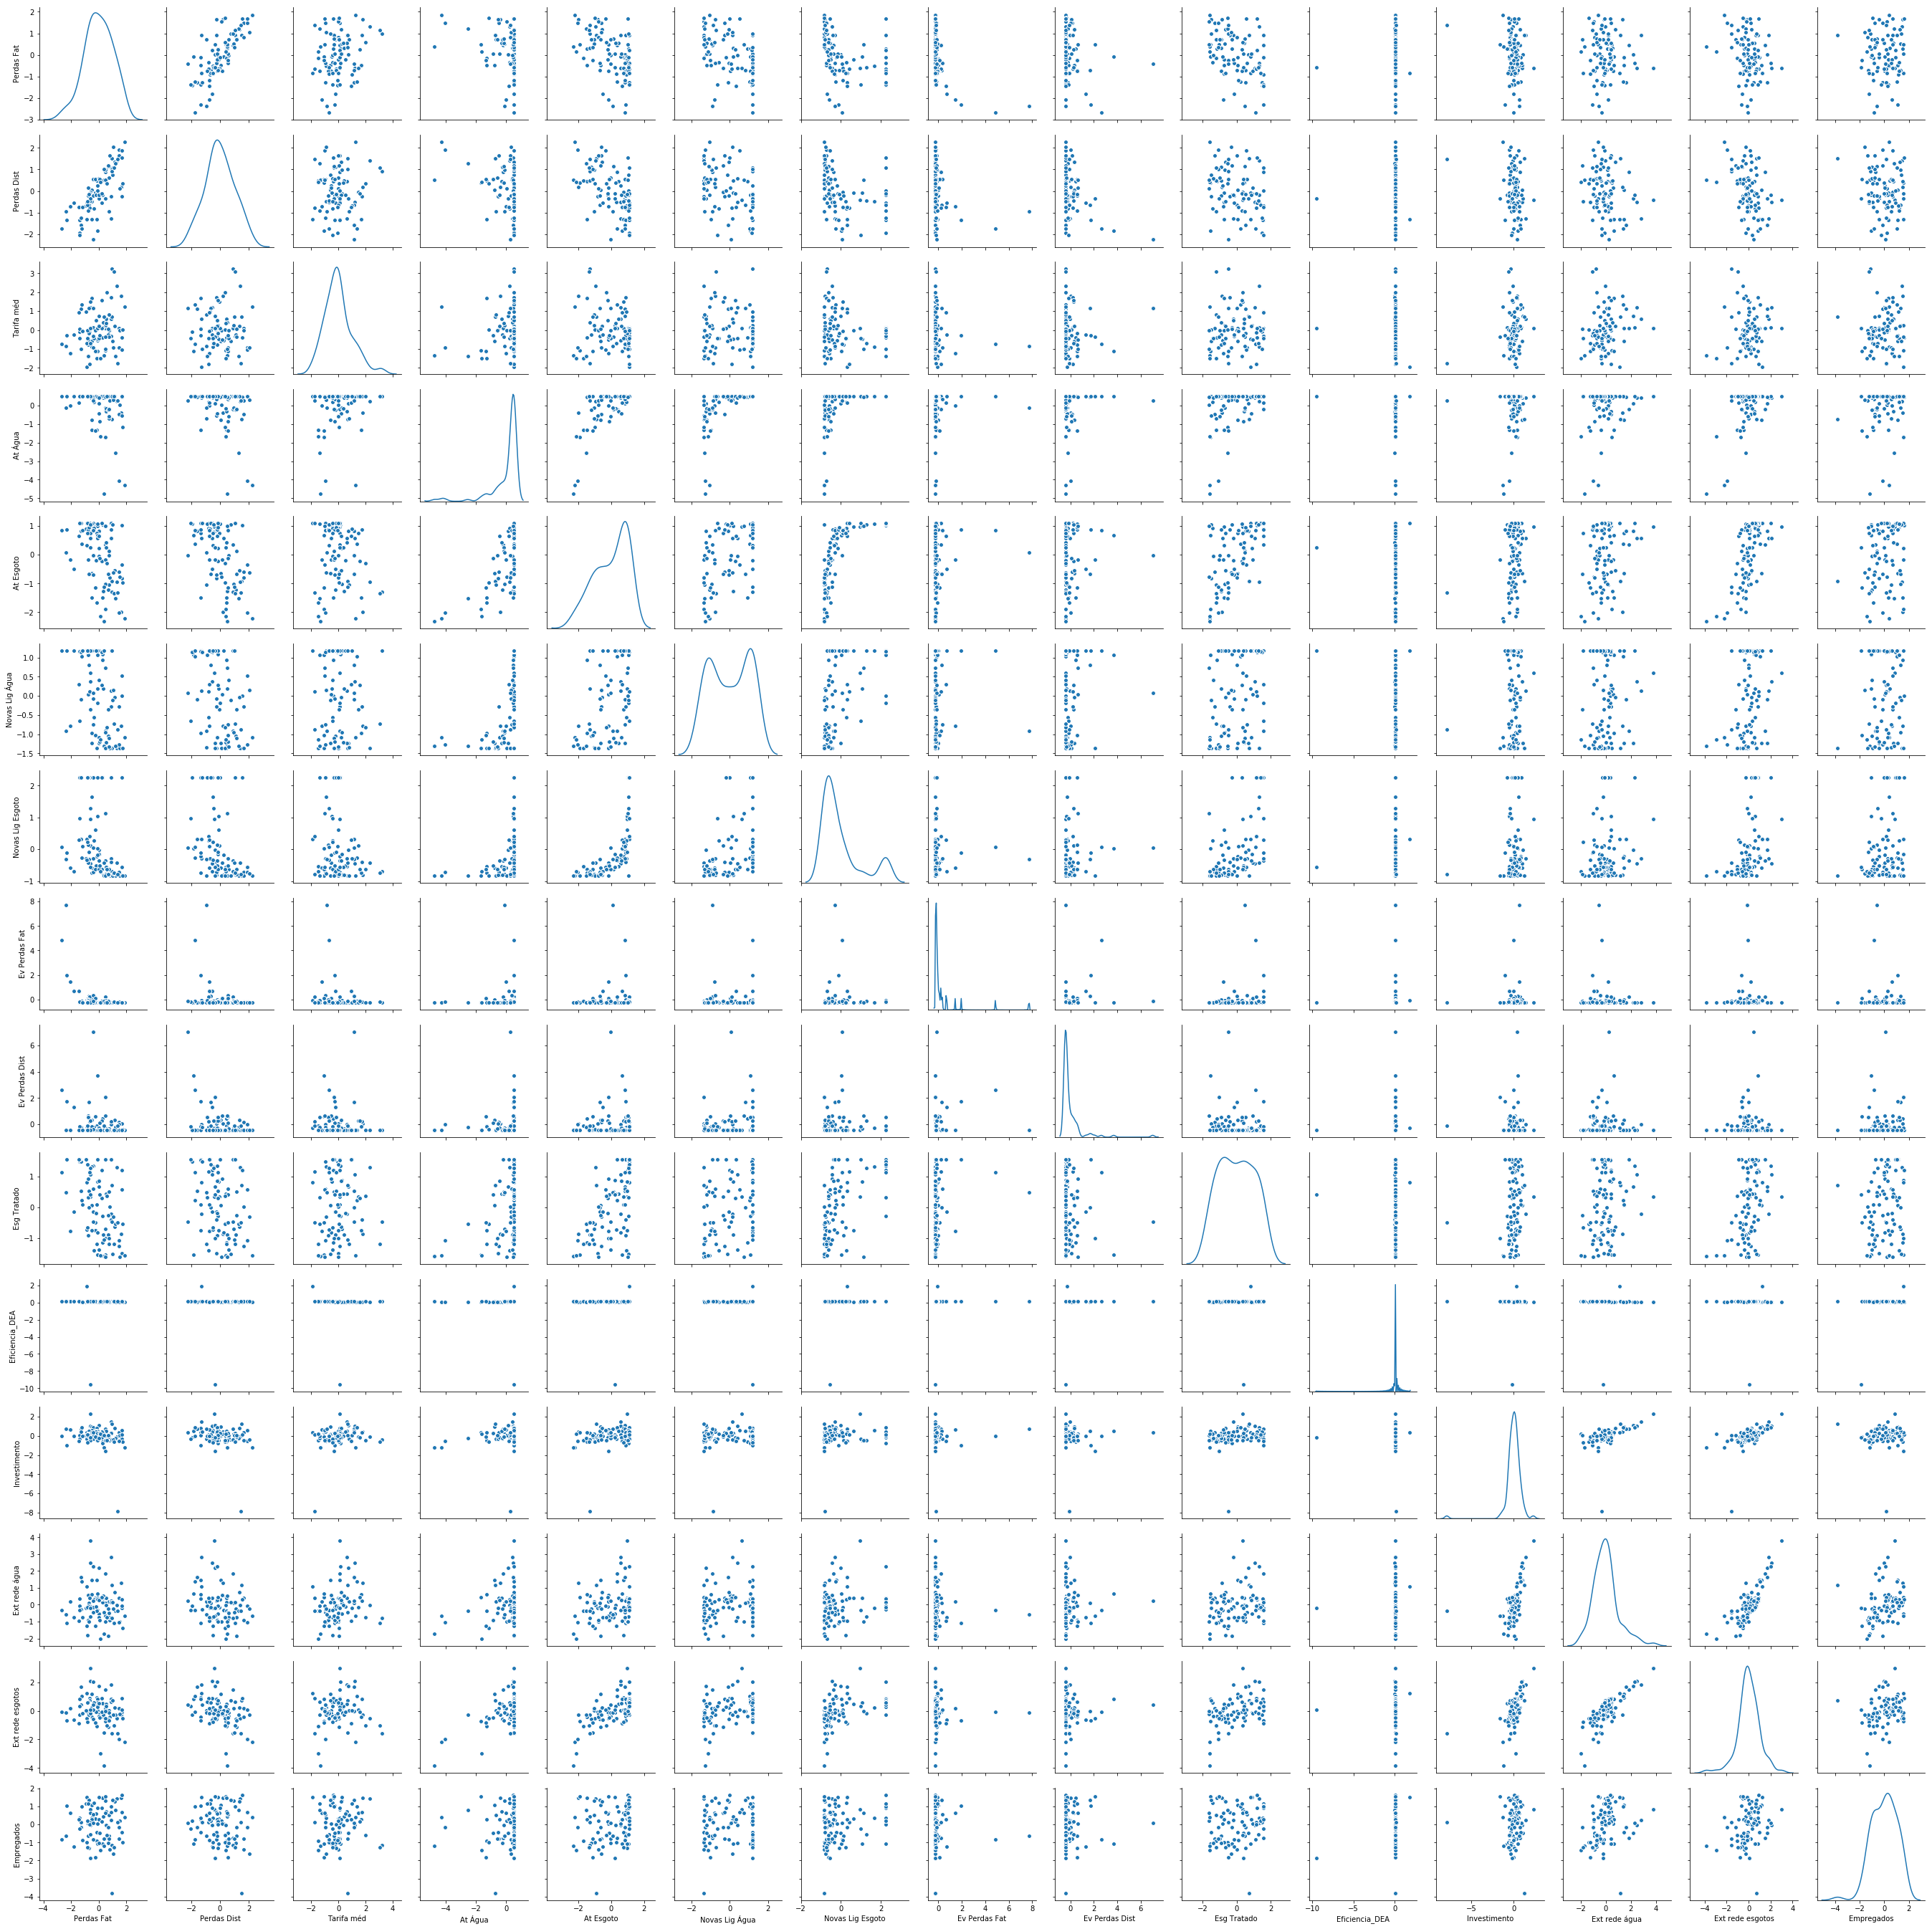

In [57]:
# pairplot para cada par de atributos
sns.pairplot(good_data, palette="husl", diag_kind="kde");

### Ponto de dados discrepantes
Os outliers são importante para analisar. Portanto, não serão excluidos.  

Text(0.5,1,'Mapa de correlacao entre os atributos das empresas escalonadas')

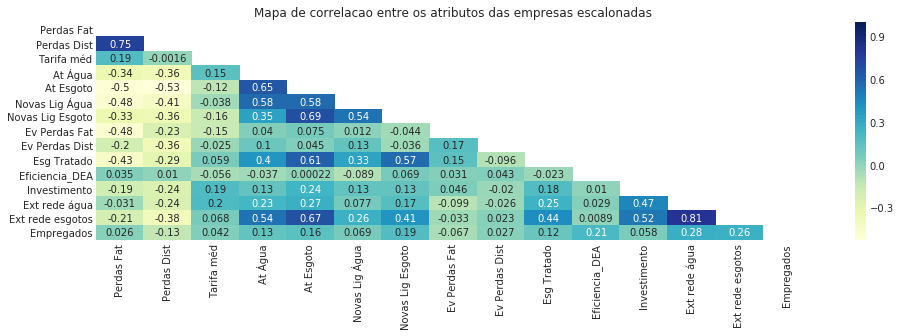

In [58]:
#Visão de correlação entre os atributos das empresa dos dados escalonados
plt.figure(figsize=(16,4))
corr = good_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Mapa de correlacao entre os atributos das empresas escalonadas')

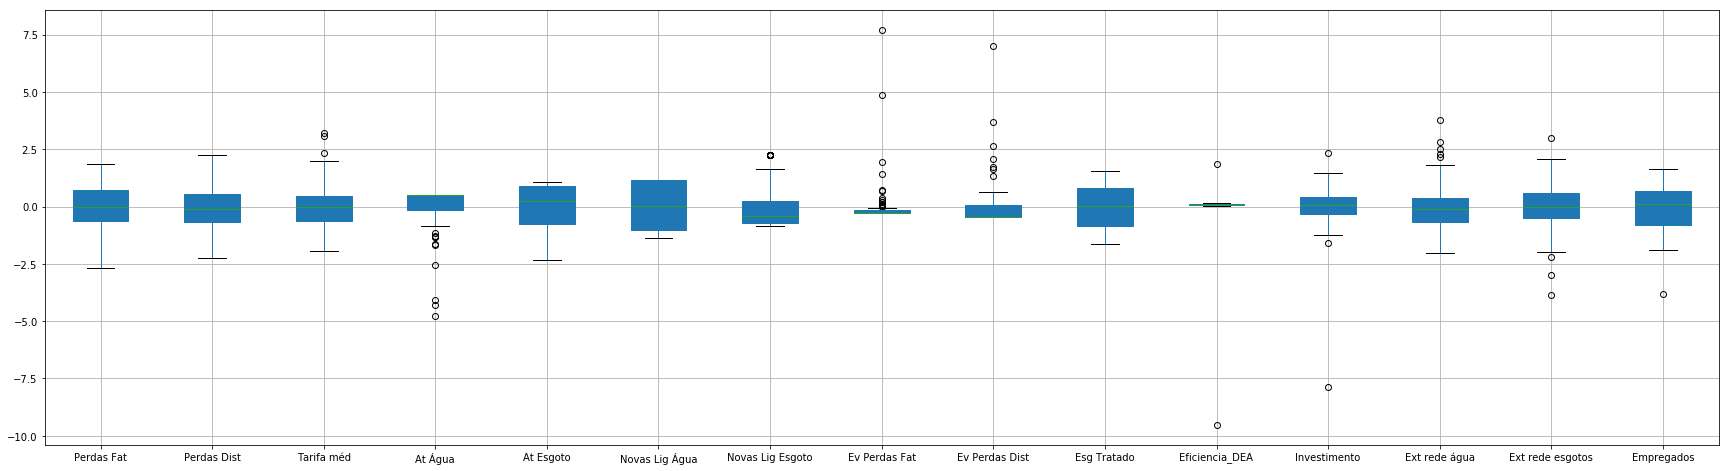

In [59]:
plt.figure(figsize=(30,8))
good_data.boxplot(whis=1.5, patch_artist=True)

### <font style="color:blue;">
    <p>
    No conjunto de dados não tempos discrepantes duplicados.
    </p>
    <p>
    A correlação entre as categorias com os outliers e sem os outliers tem resultados semelhantes, não há diferença significativa em remove-los. Depois que os atributos foram escalonados, a amplitude entre a média e a mediana ficou muito pequena se comparação com os originais. O desvio padrão também ficou pequeno como podemos ver no distplot. Os quartis também ficaram muito próximos. Optei por não remover os discrepantes, que são quase a metade dos registros podendo ocasionar uma perda grande de informação. Acredito que o vies que eles causam é parte da influência dessa analise.
    </p>
</font>

## Transformação de Atributo
Nesta seção, vamos utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados das empresas. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem as empresas.

### Implementação: PCA

Agora iremos aplicar a PCA na `good_data` para descobrir qual dimensão e dos dados melhor maximizam a variância dos atributos envolvidos e a *razão da variância explicada* de cada dimensão. 

Variância explicada
           0
0   0.311127
1   0.137219
2   0.095572
3   0.083055
4   0.073536
5   0.059028
6   0.050920
7   0.045419
8   0.040918
9   0.034095
10  0.025520
11  0.021555
12  0.011306
13  0.007603
14  0.003127


Variância explicada por duas dimensões
          0
0  0.311127
1  0.137219


              Explained Variance
Dimension 1               0.3111
Dimension 2               0.4483
Dimension 3               0.5439
Dimension 4               0.6270
Dimension 5               0.7005
Dimension 6               0.7595
Dimension 7               0.8104
Dimension 8               0.8558
Dimension 9               0.8967
Dimension 10              0.9308
Dimension 11              0.9563
Dimension 12              0.9779
Dimension 13              0.9892
Dimension 14              0.9968
Dimension 15              0.9999


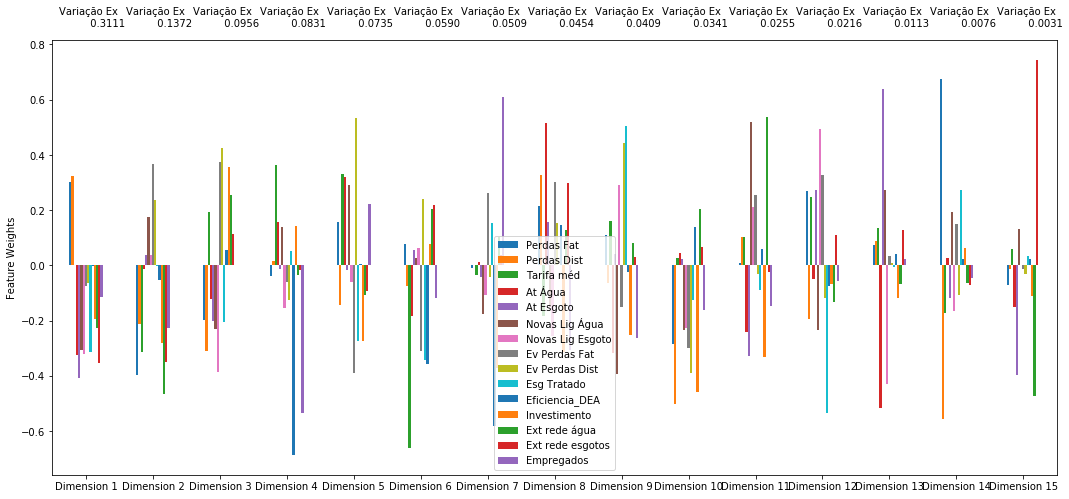

In [60]:
# Aplica a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

# Transforma a amostra de df_scaled_data_samples utilizando o ajuste da PCA acima
pca_samples = pca.transform(df_scaled_data_samples) 

# Gera o plot dos resultados da PCA
pca_results = vs.pca_results(good_data, pca)

# Para verificar a variância explicada pelas 15 componentes
print('Variância explicada')
print(pd.DataFrame(pca.explained_variance_ratio_))
print('\n')
# Para verificar a variância explicada pelos 2 primeiros componentes:
print('Variância explicada por duas dimensões')
print(pd.DataFrame(pca.explained_variance_ratio_[:2]))
print('\n')
# Gráfico da variância cumulativa
print(pd.DataFrame(pca_results['Explained Variance'].cumsum()))

Text(0.5,0,'Dimensoes')

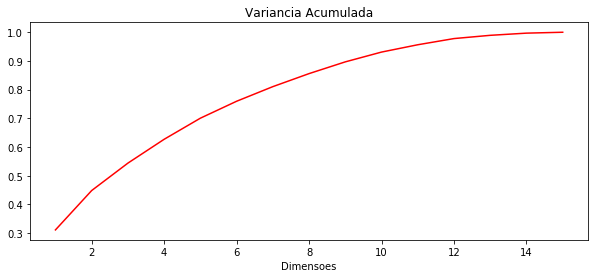

In [61]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1, len(good_data.columns)+1), np.cumsum(pca.explained_variance_ratio_), color='r')
plt.title('Variancia Acumulada')
plt.xlabel('Dimensoes')

In [62]:
for ev in range(0, len(pca_results), 1):
    print('Explained Variance da Dimensão {}: {}'.format(ev, round(pca_results['Explained Variance'][:ev].sum(),2)))

Explained Variance da Dimensão 0: 0.0
Explained Variance da Dimensão 1: 0.31
Explained Variance da Dimensão 2: 0.45
Explained Variance da Dimensão 3: 0.54
Explained Variance da Dimensão 4: 0.63
Explained Variance da Dimensão 5: 0.7
Explained Variance da Dimensão 6: 0.76
Explained Variance da Dimensão 7: 0.81
Explained Variance da Dimensão 8: 0.86
Explained Variance da Dimensão 9: 0.9
Explained Variance da Dimensão 10: 0.93
Explained Variance da Dimensão 11: 0.96
Explained Variance da Dimensão 12: 0.98
Explained Variance da Dimensão 13: 0.99
Explained Variance da Dimensão 14: 1.0


Text(0.5,1,'Mapa de calor Dimensao & Atributos')

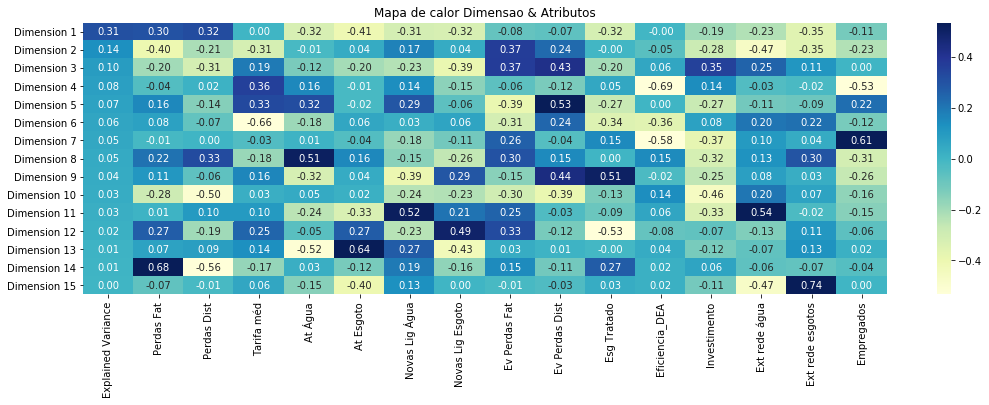

In [63]:
plt.figure(figsize=(18,5))
cmap = sns.diverging_palette(220, 
                             20, 
                             sep=20, 
                             as_cmap=True)
sns.heatmap(pca_results, 
            cmap = 'YlGnBu', 
            annot = True, 
            fmt = ".2f", 
            cbar = True, 
            robust = bool)
plt.title('Mapa de calor Dimensao & Atributos')

<font style="color:blue;">
    <p>
        A dimensão 1 aumenta com 3 atributos. Se correlaciona com Perdas Fat, Perdas Dist e Eficiência. Explicando 31% da variância no conjunto de dados.</p>
    <p>
        A dimensão 2 é fortemente correlacionada com Novas Lig Água e Esgoto, Ev Perdas Fat e Dist, Esg Tratado e Eficiência atingindo 45% da variância junto com a dimensão 1.</p>
    <p>
       Indo para dimensão 8 a variância acumulada é de 86%. Sendo bem correlacionada com Perdas Fat, Perda Dist, At Água, At Esg, Ev Perdas Fat, Ev Perdas Dist, Esg Tratado, Ext rede água e esgoto.  
    </p>
    <p>
       Analisando as 8 primeiras dimensões, a Ext Rede Água e Ext Rede Esgoto mostram uma leve tendência linear e é o par mais correlacionado do conjunto de dados com 0.96 de coeficiente e tem um viés pequeno. 
    </p>
</font>

### Observação
Mudança da amostra transformado depois de receber a transformação da PCA aplicada a ele em quinze dimensões. 

In [64]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -3.8865      -3.4001       1.2700      -0.1892      -1.1010   
1      -1.9658      -2.7763       1.6363       0.2044       0.0373   
2       0.7753      -1.8581       0.4340      -0.4151       0.6825   

   Dimension 6  Dimension 7  Dimension 8  Dimension 9  Dimension 10  \
0       1.3095      -0.1102       0.0415      -0.4975        0.0474   
1       0.8869      -0.1909       0.3224      -0.1954        0.5760   
2       0.1428       0.4661       0.5425      -0.9389       -1.1641   

   Dimension 11  Dimension 12  Dimension 13  Dimension 14  Dimension 15  
0        1.0124       -0.0990       -0.0770       -0.5771       -0.1099  
1        0.5677        0.3452        0.2139        0.9337       -0.4419  
2       -0.0288       -0.4477       -0.1273       -0.1159       -0.2584

### Implementação: Redução da Dimensionalidade
Reduzir a dimensionalidade dos dados e reduzindo a complexidade do problema.

In [65]:
df_scaled_data_samples

Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0   -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
1    0.915040    -1.290252    0.607582  0.431364   0.580661        0.129712   
2    1.170928     1.359953    0.225875  0.506916  -0.545998       -0.040263   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0          0.940444      -0.262217       -0.437521     0.344721   
1         -0.294058      -0.246659       -0.018069    -0.209133   
2         -0.810791      -0.262217        0.317493    -0.641108   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0        0.046713      2.325160       3.789932          3.003657    0.841060  
1        0.048527      1.458984       2.838261          1.814404    0.250806  
2        0.043225      0.794442       0.757702          0.223522    1.273979

In [66]:
# Aplica o PCA ao ajusta good_data com apenas duas dimensões
#pca = PCA(n_components=2).fit(good_data)
pca = PCA(n_components=2).fit(good_data)

# Transforma good_data utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)
reduced_data_scaled = pca.transform(df_scaled_data)

# Transforma a amostre de df_scaled_data_samples utilizando o ajuste de PCA acima
reduced_data_samples = pca.transform(df_scaled_data_samples)
pca_samples = pca.transform(df_scaled_data_samples) # era reduced_data_samples

# Cria o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [67]:
df_scaled_data_samples

Perdas Fat  Perdas Dist  Tarifa méd   At Água  At Esgoto  Novas Lig Água  \
0   -0.600607    -0.403459    0.091762  0.506916   0.986121        0.604162   
1    0.915040    -1.290252    0.607582  0.431364   0.580661        0.129712   
2    1.170928     1.359953    0.225875  0.506916  -0.545998       -0.040263   

   Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  Esg Tratado  \
0          0.940444      -0.262217       -0.437521     0.344721   
1         -0.294058      -0.246659       -0.018069    -0.209133   
2         -0.810791      -0.262217        0.317493    -0.641108   

   Eficiencia_DEA  Investimento  Ext rede água  Ext rede esgotos  Empregados  
0        0.046713      2.325160       3.789932          3.003657    0.841060  
1        0.048527      1.458984       2.838261          1.814404    0.250806  
2        0.043225      0.794442       0.757702          0.223522    1.273979

In [68]:
#Mapeando novos valores para o target
df_target = []
df_target = np.array(df_san['Nat Jurídica'].map({'Autarquia': 1,
                                                  'APD': 1,
                                                  'SEMAPriv': 1,
                                                  'Privada': 2,
                                                  'SEMAPubl': 1,
                                                  'OS': 1,
                                                  'Pública': 1}))

Text(0,0.5,'Dimensão 2')

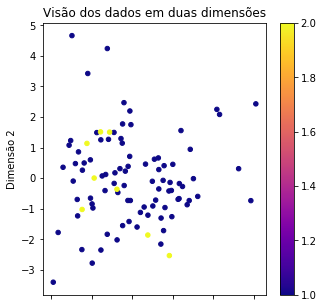

In [69]:
# Espaço dimensional de 15 para 2. É incapaz de separar muito bem os dados
pd.DataFrame(reduced_data_scaled).plot.scatter(0, 1, c=df_target, cmap = 'plasma',figsize=(5,5))
plt.title('Visão dos dados em duas dimensões')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')

Explained Variance  Perdas Fat  Perdas Dist  Tarifa méd  At Água  \
Dimension 1              0.3111      0.3027       0.3225      0.0004  -0.3245   
Dimension 2              0.1372     -0.3973      -0.2131     -0.3144  -0.0135   

             At Esgoto  Novas Lig Água  Novas Lig Esgoto  Ev Perdas Fat  \
Dimension 1    -0.4070         -0.3083           -0.3212        -0.0764   
Dimension 2     0.0382          0.1740            0.0387         0.3679   

             Ev Perdas Dist  Esg Tratado  Eficiencia_DEA  Investimento  \
Dimension 1         -0.0654      -0.3151         -0.0007       -0.1941   
Dimension 2          0.2360      -0.0024         -0.0522       -0.2825   

             Ext rede água  Ext rede esgotos  Empregados  
Dimension 1        -0.2253           -0.3525     -0.1145  
Dimension 2        -0.4664           -0.3499     -0.2258

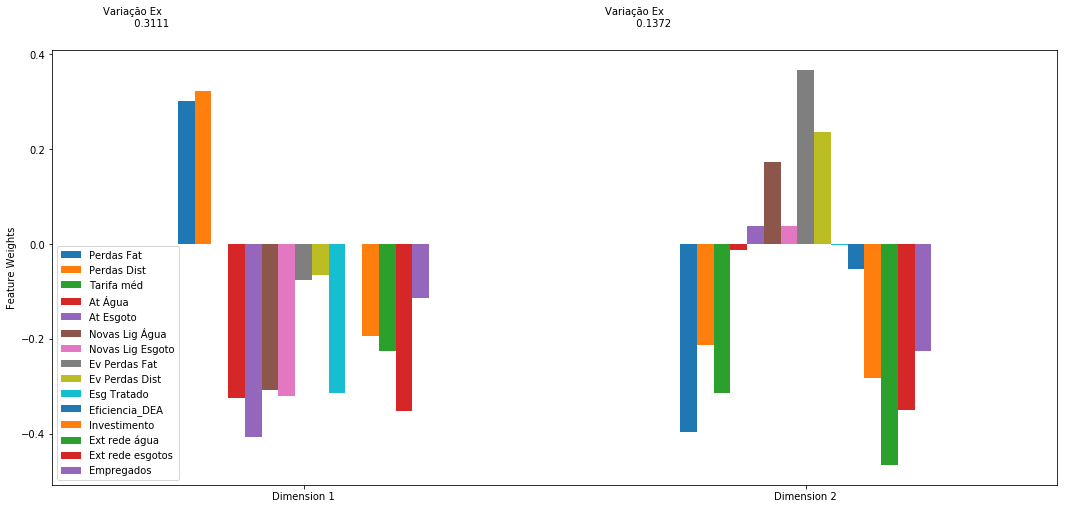

In [70]:
display(vs.pca_results(good_data, pca))

In [71]:
df_comp = pd.DataFrame(pca.components_, columns=df_scaled_data.columns)

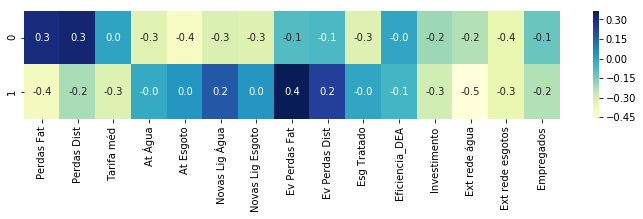

In [72]:
# mapa de calor entre atributos e componentes
plt.figure(figsize=(12, 2))
sns.heatmap(df_comp,
            cmap='YlGnBu',
            fmt = '.1f', 
            annot=True,
            cbar=True)

### Observação
Os valores das duas primeiras dimensões permanecem iguais quando comparados com a transformação do PCA em quinze dimensões.

In [73]:
# Depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(reduced_data_scaled, 4), columns = ['Dimension 1', 'Dimension 2']).head())

Dimension 1  Dimension 2
0      -3.8865      -3.4001
1      -1.9658      -2.7763
2      -2.4751      -2.3341
3      -0.7402      -2.0167
4      -0.1504      -1.4157

## Visualizando um Biplot
Gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Podemos ver a projeção dos atributos originais junto das componentes. Vai nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

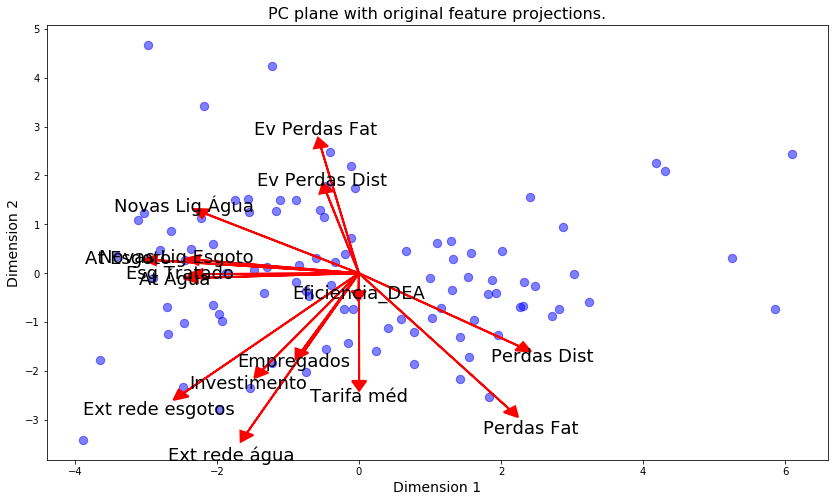

In [74]:
vs.biplot(good_data, 
          reduced_data, 
          pca)

**Nota:** 
Lista de atributos correlacionados entre si:
- Ev Perdas Fat/Ev Perdas Dist
- At Água/At Esgoto/Esg Tratado/Novas Lig Esgoto
- Empregados/Investimento/Est rede Água e Esgoto

## Clustering

<font style="color:blue;">
   <p>Escolho K-means por ter custo computacional mais baixo, é mais rápido e mais eficiente para esse conjunto de dados. O K-means distingue rigidamente os limites de um cluster do outro. O K-means não diverge os locais dos pontos, dimensionando bem o conjunto de dados. O algoritmo tem o custo de execução mais baixo que o GMM, para extração dos clusters o algoritimo calcula somente a média dos pontos atribuídos a um cluster.
    </p>
</font>

### Visualização de Cluster
visualizar os resultados com o ajuste dos números de clusters em ordem decrescente até o número ótimo de clusters. 

In [75]:
sKMeans = []
n_clusters = []

for components in range(10,1,-1):
    
    # Aplica o algoritmo de clustering de sua escolha aos dados reduzidos 
    clustererKMeans = KMeans(n_clusters=components, random_state=50).fit(reduced_data)
    
    # Preve o cluster para cada ponto de dado
    predsKMeans = clustererKMeans.predict(reduced_data)

    # Encontra os centros do cluster
    centersKMeans = clustererKMeans.cluster_centers_

    # Preve o cluster para cada amostra de pontos de dado transformados
    sample_predsKMeans = clustererKMeans.predict(reduced_data_samples)
    
    # Calcula a média do coeficiente de silhueta para o número de clusters escolhidos
    scoreKMeans = silhouette_score(reduced_data, predsKMeans)
    
    sKMeans.append(scoreKMeans)
    n_clusters.append(components)
    print('Score de {} para {} clusters.'.format(scoreKMeans, components))

Score de 0.384713585446032 para 10 clusters.
Score de 0.38185551779333465 para 9 clusters.
Score de 0.3888304667089629 para 8 clusters.
Score de 0.3724032609039723 para 7 clusters.
Score de 0.3576964666294651 para 6 clusters.
Score de 0.36844307695957434 para 5 clusters.
Score de 0.36992365128059385 para 4 clusters.
Score de 0.37226114589192955 para 3 clusters.
Score de 0.4412325997781242 para 2 clusters.


In [76]:
comp_scores = pd.DataFrame({'Score KMeans': sKMeans}, index=n_clusters)
comp_scores.sort_index(ascending=True)

Score KMeans
2       0.441233
3       0.372261
4       0.369924
5       0.368443
6       0.357696
7       0.372403
8       0.388830
9       0.381856
10      0.384714

Text(0.5,0,'n_clusters')

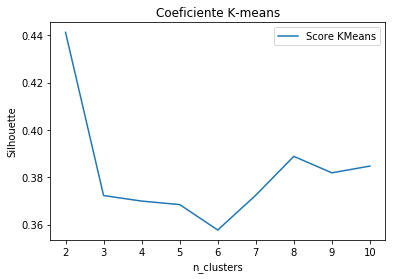

In [77]:
comp_scores.plot(title='Coeficiente K-means')
plt.ylabel("Silhouette")
plt.xlabel("n_clusters")

<font style="color:blue;">
    O melhor coeficiente foi para 2 clusters ficando: <strong>2 clusters = 0.44</strong>, 3 clusters = 0.37, 4 clusters = 0.38, 5 clusters = 0.34, 6 clusters = 0.39, 7 clusters = 0.37, 8 clusters = 0.38, 9 clusters = 0.39 e 10  clusters = 0.38.
</font>

In [78]:
n_clusters = 2 
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2']) #
# Aplica o algoritmo de clustering aos dados reduzidos 
clusterer = KMeans(n_clusters, random_state=50).fit(reduced_data)

# Preve o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# Encontra os centros do cluster
centers = clusterer.cluster_centers_

# Calcula a média do coeficiente de silhueta para o número de clusters
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
print("KMeans score", score)

KMeans score 0.4412325997781242


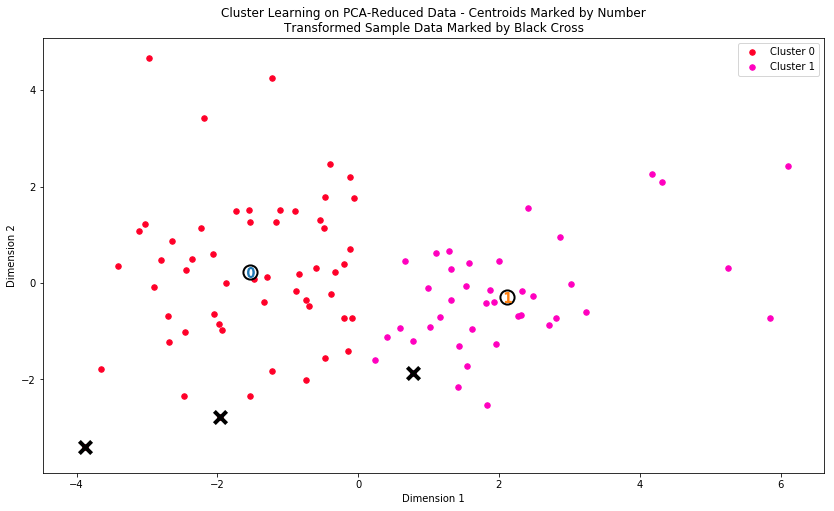

In [79]:
# Mostra dos resultados do clustering da implementação
vs.cluster_results(reduced_data, 
                   preds, 
                   centers, 
                   pca_samples)

### Implementação: Recuperação de Dados
Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar os atributos representativo das empresas desses pontos de dados ao aplicar transformações inversas.

In [80]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centersKMeans)

# Transforma na inversa do escalonamento
scaled_center = scaler.inverse_transform(log_centers)

# TODO: Exponencie os centros somente dos atributos anteriormente rodados np.log
t1 = np.exp(list(scaled_center[0:1][0][11:15]))
t2 = np.exp(list(scaled_center[1:2][0][11:15]))
l1 = scaled_center[0:1][0][0:11]
l2 = scaled_center[1:2][0][0:11]
novo_array = np.array([t1,t2])
novo_array = np.array([list(np.append(l1,t1)),list(np.append(l2,t2))])
true_centers = novo_array

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centersKMeans))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df_previsores_novo.keys())
true_centers.index = segments
display(true_centers)

Perdas Fat  Perdas Dist  Tarifa méd  At Água  At Esgoto  \
Segment 0        26.0         35.0         4.0    100.0       87.0   
Segment 1        50.0         51.0         4.0     84.0       43.0   

           Novas Lig Água  Novas Lig Esgoto  Ev Perdas Fat  Ev Perdas Dist  \
Segment 0            74.0              43.0           25.0             5.0   
Segment 1            26.0               4.0           -0.0             2.0   

           Esg Tratado  Eficiencia_DEA  Investimento  Ext rede água  \
Segment 0         66.0            33.0         214.0         1758.0   
Segment 1         30.0            47.0          78.0         1170.0   

           Ext rede esgotos  Empregados  
Segment 0            1168.0      2821.0  
Segment 1             364.0      2237.0

### Representação de segmento das empresas

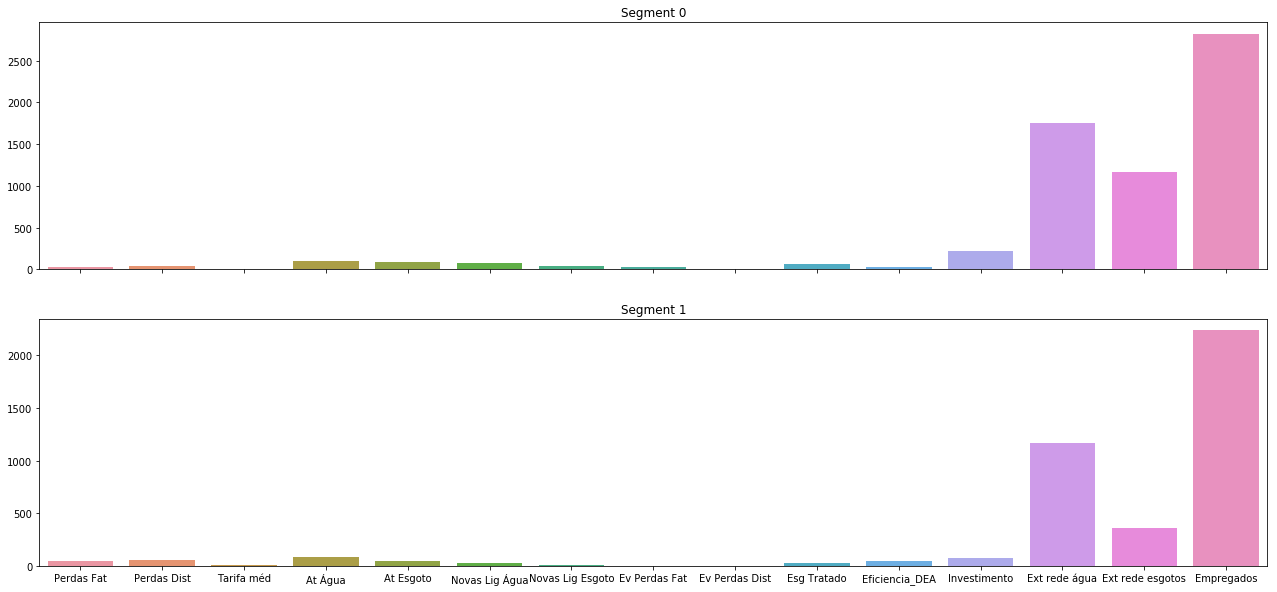

In [81]:
fig, (x1, x2) = plt.subplots(2, 1, figsize=(22, 10), sharex = True)
x1.set_title('Segment 0')
sns.barplot(x = true_centers.columns.values, y = true_centers.iloc[0].values, ax = x1)
x2.set_title('Segment 1')
sns.barplot(x = true_centers.columns.values, y = true_centers.iloc[1].values, ax = x2)

<font style="color:blue;">
    <p>
    Considerando os totais de cada atributo, os centros de clusters representam dois tipos de empresas caracteristicas muito semelhantes, não sendo possivel identificar seus respectivos segmentos por suas caracteristicas. Cada atributo é ligeiramente igual nos dois segmentos</p>
    <p>
    Essas caracteristicas podem ter herdada pela Natureza Jurídica que acabam misturando empresas públicas com administração privada.</p>
</font>

### Representação de segmento da amostra de empresas

In [82]:
# Mostre as previsões
for i, pred in enumerate(sample_predsKMeans):
    print ('Ponto de amostragem {} previsto para ser em Cluster {}'.format(i, pred))

Ponto de amostragem 0 previsto para ser em Cluster 0
Ponto de amostragem 1 previsto para ser em Cluster 0
Ponto de amostragem 2 previsto para ser em Cluster 1


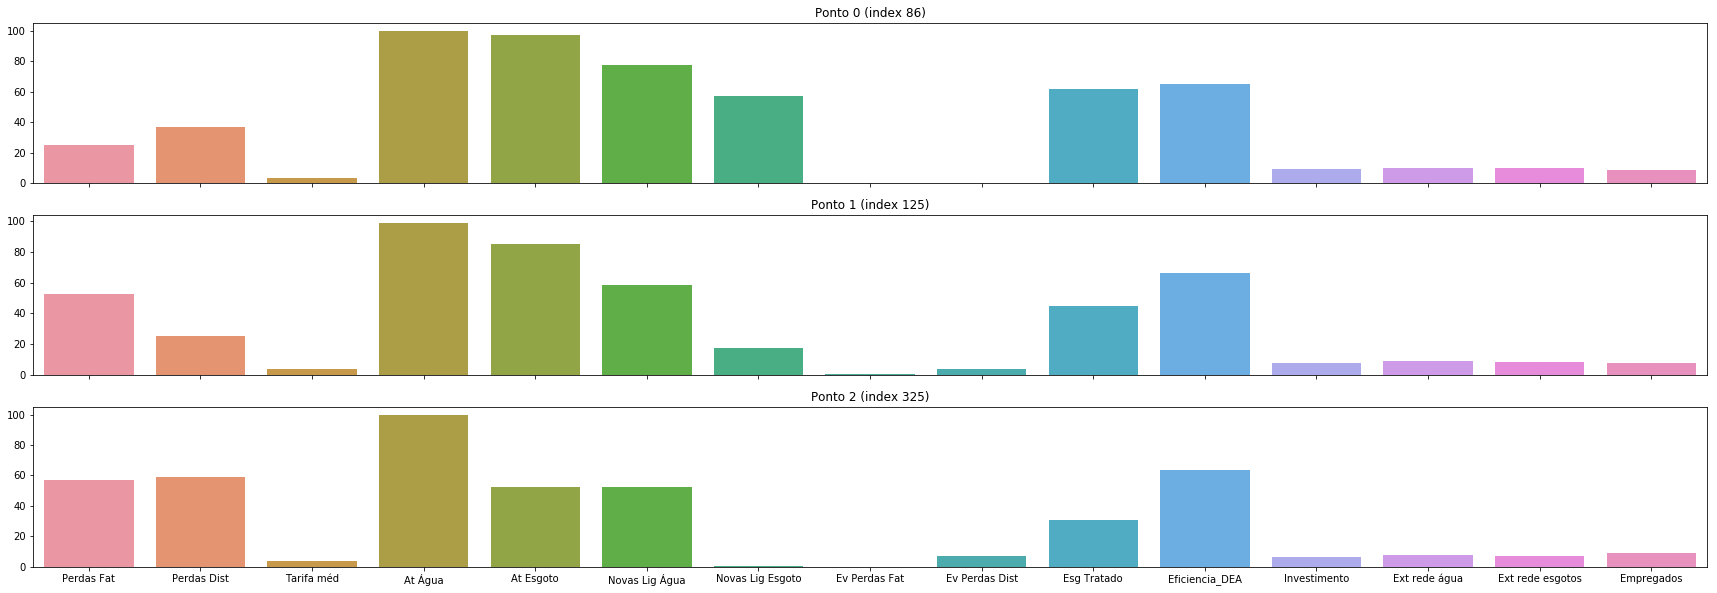

In [83]:
fig, (x1, x2, x3) = plt.subplots(3, 1, figsize=(30, 10), sharex = True)
x1.set_title('Ponto 0 (index 86)')
sns.barplot(x = df_previsores_samples_novo.columns.values, y = df_previsores_samples_novo.iloc[0].values, ax = x1)
x2.set_title('Ponto 1 (index 125)')
sns.barplot(x = df_previsores_samples_novo.columns.values, y = df_previsores_samples_novo.iloc[1].values, ax = x2)
x3.set_title('Ponto 2 (index 325)')
sns.barplot(x = df_previsores_samples_novo.columns.values, y = df_previsores_samples_novo.iloc[2].values, ax = x3)

<font style="color:blue;">
    <p>O algoritmo conseguiu separar os segmentos, como iremos constatar abaixo que empresas do segmento 0 são públicas e do segmento 1 são privadas.</p>
    <p>O ponto 0 pertence ao seguimento 0.</p>
    <p>O ponto 1 pertence ao seguimento 0.</p>
    <p>O ponto 2 pertence ao seguimento 1.</p>
</font>

## Conclusão

Nesta seção final vamos considerar dois segmentos de empresa(pública e privada). Por fim, vamos comparar os **segmentos de empresas** com uma variável 'Tipo' nos dados, para ver se o cluster identificou corretamente a relação.

<font style="color:blue;">
    <p>
        Temos dois grandes segmentos previstos pelo modelo que são referentes as categorias de serviços de empresas de saneamento.</p>
    <p>
        Um fator curioso para definir as empresa é que pelas caracteristicas que atribuimos os dois segmentos são iguais.</p>
    <p>
        Uma variável oculta é a saúde da população. De maneira que os serviços estejam sendo realizados adequadamente a população dende a ser mais saudável. Não faz sentido ter uma população com muitas doenças se tem um serviço de saneamento adequado, gerando prejuízo ao população.</p>
    <p>
        Proponho a realização de testes A/B constantemente nos serviços das empresas e medir a satisfação pelo serviços para evitar qualquer tipo de coincidências que possam ocorrer. Isso nos dará informações mais confiáveis e ampliará nosso conjunto de dados.</p>
</font>

Ao agrupar as empresas, temos uma melhor ideia de qual segmento de empresa pode ser mais eficiênte e aplicar mudanças nas prefeituras para que os resultados sejam mais precisos. Mas não podemos considerar um grupo mais eficiente que o outro. 

### Uma aprendizagem não supervisionada pode ser utilizada para treinar as empresas dos dados originais

<font style="color:blue;">
    <p>Como já temos do modelo que foram criadas no bloco de código de criação de clusters, em cada empresa aplicamos as predições no bloco de código que mostra as previsões. O bloco de previsões pode ser usado para prever o segmento de clientes para novos empresas, possibilitando a escolha do tipo de empresa mais apropriado para saneamento.</p>
</font>

### Visualizando Distribuições Subjacentes

No começo deste projeto, não consideramos o atributo `'Tipo de empresa'`, então os atributos das empresas seriam enfatizadas na análise. Ao reintroduzir o atributo `'Tipo de empresa'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

In [84]:
pca_samples

array([[-3.88653396, -3.40013217],
       [-1.9657882 , -2.77632725],
       [ 0.77532345, -1.85808763]])

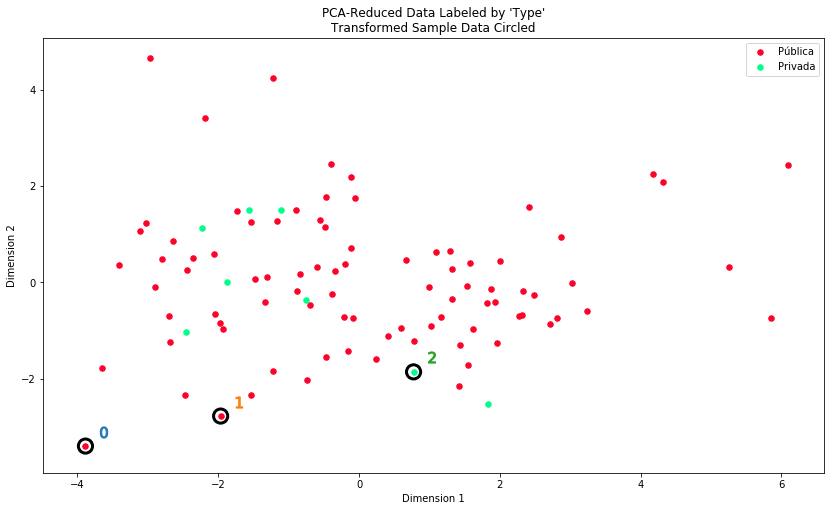

In [85]:
# Mostre os resultados do clustering baseado nos dados do 'Tipo'
vs.channel_results(reduced_data, 
                   outliers, 
                   pca_samples)

### Comparação de metodos de clusterização da distribuição subjacente de empresas

In [86]:
print("KMeans score", scoreKMeans) # já calculado

KMeans score 0.4412325997781242


GGM score 0.4264552940203914


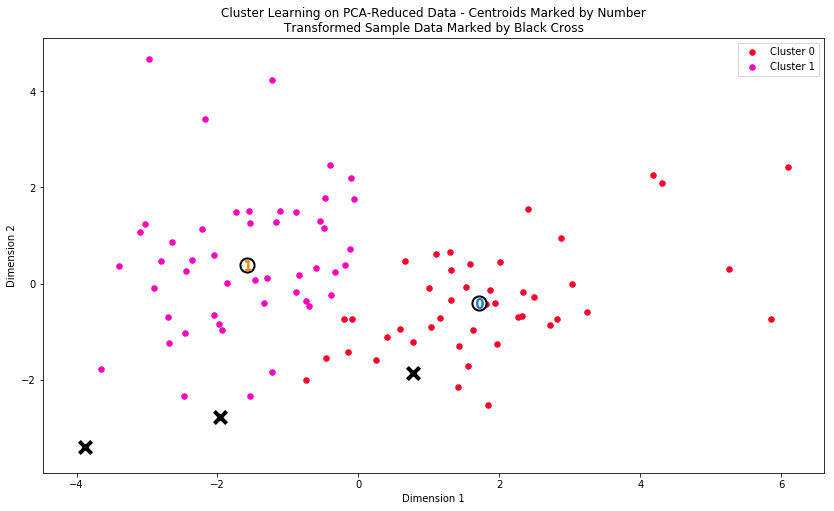

In [87]:
# n_components = 2
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,
                         preds)

print("GGM score", score)

# Mostre os resultados do clustering da implementação
vs.cluster_results(reduced_data, 
                   preds, 
                   centers, 
                   pca_samples)

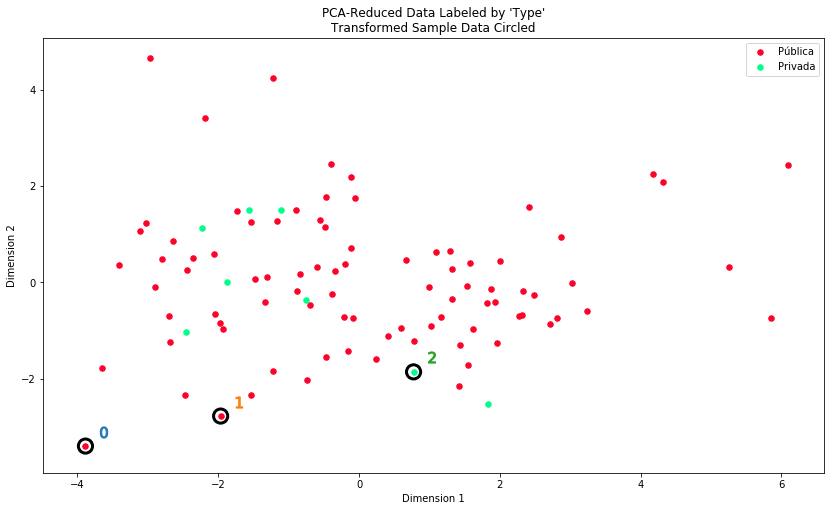

In [88]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results(reduced_data, 
                   outliers, 
                   pca_samples)

**Resposta:**

<font style="color:blue;">
    <p>
        O gráfico separa de forma semelhante ao modelo os três círculos indicando os pontos da amostra escolhida no inicio. A distribuição se relaciona bem com o clusters previstos no modelo qua utiliza algoritmos Kmeans.</p>
    <p>
        Os ponto 0 e 1 confirmam ser empresas públicas e o ponto 2 uma empresa privada, portanto confirma a previsão do modelo proposto, mostrando parcialmente que o algoritmo K-means foi bom na distribuição das empresas.</p>
    <p>
        Considero essa classificação sólida comparada com a definição de empresas que obtive anteriormente.</p>
</font>

Essas classificações são consistentes com a definição anterior dos segmentos de clientes tanto no K-Means quanto no GMM. Por fim, observou-se que o K-Means apresentou um score melhor que o GMM para esse problema.